<a href="https://colab.research.google.com/github/TNaingHtwe/GraSPP-25S-climatechange/blob/main/notebooks/20250525_Disaster_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EM-DAT Data**

Data source https://public.emdat.be/


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import os
import statsmodels.formula.api as smf

In [2]:
#Created a fork and cloned data from repo to use
!git clone https://github.com/TNaingHtwe/GraSPP-25S-climatechange.git
%cd GraSPP-25S-climatechange/notebooks

Cloning into 'GraSPP-25S-climatechange'...
remote: Enumerating objects: 494, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 494 (delta 59), reused 43 (delta 31), pack-reused 387 (from 2)
Receiving objects: 100% (494/494), 46.58 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (222/222), done.
/content/GraSPP-25S-climatechange/notebooks


In [3]:
os.listdir('../data/raw/')

['english_policy_GHG_selenium_120.csv',
 'english_policy_GHG_selenium_30.csv',
 'eu_press_releases_ghg.csv',
 'United States 2035 NDC.pdf',
 'english_policy_GHG_selenium_143.csv',
 'english_policy_GHG_selenium_90.csv',
 'ES-2023-10-17 EU submission NDC update.pdf',
 'EDGAR_2024_GHG_booklet_2024.xlsx',
 'United States NDC April 21 2021 Final.pdf',
 'policies_download.csv',
 'english_policy_GHG_selenium_60.csv',
 'public_emdat_custom_request_2025-05-06_fbc8ee61-93e5-46cb-b9a2-492c362b1411.xlsx',
 'renewable-share-energy.csv',
 '.gitkeep']

In [4]:
# Load the data from the cloned repo
df = pd.read_excel('../data/raw/public_emdat_custom_request_2025-05-06_fbc8ee61-93e5-46cb-b9a2-492c362b1411.xlsx')

df["Entry Date"] = pd.to_datetime(df["Entry Date"], errors='coerce')
df["Year"] = df["Entry Date"].dt.year

# Preview
df.head()

DisNo. Historic Classification Key Disaster Group  \
0  2005-0002-CHN       No    tec-tra-roa-roa  Technological   
1  2005-0003-BRA       No    nat-met-sto-tor        Natural   
2  2005-0005-IRN       No    tec-mis-exp-exp  Technological   
3  2005-0007-CHN       No    tec-tra-roa-roa  Technological   
4  2005-0008-ITA       No    tec-tra-rai-rai  Technological   

        Disaster Subgroup              Disaster Type  \
0               Transport                       Road   
1          Meteorological                      Storm   
2  Miscellaneous accident  Explosion (Miscellaneous)   
3               Transport                       Road   
4               Transport                       Rail   

            Disaster Subtype External IDs  Event Name  ISO  ...  \
0                       Road          NaN         NaN  CHN  ...   
1                    Tornado          NaN         NaN  BRA  ...   
2  Explosion (Miscellaneous)          NaN  Appartment  IRN  ...   
3                       Road          NaN         NaN  CHN  ...   
4                       Rail          NaN         NaN  ITA  ...   

  Reconstruction Costs, Adjusted ('000 US$) Insured Damage ('000 US$)  \
0                                       NaN                       NaN   
1                                       NaN                       NaN   
2                                       NaN                       NaN   
3                                       NaN                       NaN   
4                                       NaN                       NaN   

  Insured Damage, Adjusted ('000 US$) Total Damage ('000 US$)  \
0                                 NaN                     NaN   
1                                 NaN                     NaN   
2                                 NaN                     NaN   
3                                 NaN                     NaN   
4                                 NaN                     NaN   

  Total Damage, Adjusted ('000 US$)       CPI  \
0                               NaN  64.09274   
1                               NaN  64.09274   
2                               NaN  64.09274   
3                               NaN  64.09274   
4                               NaN  64.09274   

                                    Admin Units Entry Date Last Update  Year  
0                                           NaN 2005-01-06  2023-09-25  2005  
1  [{"adm2_code":10760,"adm2_name":"Criciuma"}] 2005-01-06  2023-09-25  2005  
2                                           NaN 2005-01-06  2023-09-25  2005  
3                                           NaN 2005-01-06  2023-09-25  2005  
4                                           NaN 2005-03-28  2023-09-25  2005  

[5 rows x 47 columns]

Add a new column Region to group the countries.

In [5]:
# Tag EU and other important countries
eu_countries = [ "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia",
                 "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia",
                 "Lithuania", "Luxembourg", "Malta", "Netherlands (Kingdom of the)", "Poland", "Portugal",
                 "Romania", "Slovakia", "Slovenia", "Spain", "Sweden" ]
other_countries = [
    "China", "United States", "India", "Russian Federation", "Indonesia",
    "Brazil", "Japan", "Iran", "Canada",'Iran (Islamic Republic of)','United States of America'
]

# Assign 'Region' for logic
def assign_region(country):
    if country in eu_countries:
        return "Europe"
    elif country in ["United States", "United States of America", "Canada", "Brazil"]:
        return "Americas"
    elif country in ["China", "India", "Japan", "Indonesia", "Iran", "Iran (Islamic Republic of)"]:
        return "Asia"
    else:
        return "Other"

df["Region"] = df["Country"].apply(assign_region)


Checking unnesscesary columns and filtering for natural disaster related!!!

In [6]:
print(df.columns.tolist())
df.info()

#Checking data related to disaster
print("Disaster Group:")
print(df["Disaster Group"].unique())

print("\nDisaster Subgroup:")
print(df["Disaster Subgroup"].unique())

print("\nDisaster Type:")
print(df["Disaster Type"].unique())

print("\nDisaster Subtype:")
print(df["Disaster Subtype"].unique())


['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update', 'Year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4219 entries, 0 to 4218
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype         
-

Filtering for Natural Disaster Related

In [7]:
#Filtering out the natural disaster
climate_subgroups = ["Meteorological", "Hydrological", "Climatological"]
df_climate = df[
    (df["Disaster Group"] == "Natural") &
    (df["Disaster Subgroup"].isin(["Meteorological", "Hydrological", "Climatological"]))
].copy()

df_climate["Total Damage (Million USD)"] = (
    df_climate["Total Damage, Adjusted ('000 US$)"] / 1000
)

df_climate.head()

DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
1  2005-0003-BRA       No    nat-met-sto-tor        Natural    Meteorological   
6  2005-0011-DEU       No    nat-met-sto-ext        Natural    Meteorological   
7  2005-0011-DNK       No    nat-met-sto-ext        Natural    Meteorological   
8  2005-0011-EST       No    nat-met-sto-ext        Natural    Meteorological   
9  2005-0011-IRL       No    nat-met-sto-ext        Natural    Meteorological   

  Disaster Type      Disaster Subtype External IDs Event Name  ISO  ...  \
1         Storm               Tornado          NaN        NaN  BRA  ...   
6         Storm  Extra-tropical storm          NaN      Erwin  DEU  ...   
7         Storm  Extra-tropical storm          NaN      Erwin  DNK  ...   
8         Storm  Extra-tropical storm          NaN      Erwin  EST  ...   
9         Storm  Extra-tropical storm          NaN      Erwin  IRL  ...   

  Insured Damage ('000 US$) Insured Damage, Adjusted ('000 US$)  \
1                       NaN                                 NaN   
6                  200000.0                            312048.0   
7                  900000.0                           1404215.0   
8                   26000.0                             40566.0   
9                       NaN                                 NaN   

  Total Damage ('000 US$) Total Damage, Adjusted ('000 US$)       CPI  \
1                     NaN                               NaN  64.09274   
6                270000.0                          421265.0  64.09274   
7               1300000.0                         2028311.0  64.09274   
8                130000.0                          202831.0  64.09274   
9                     NaN                               NaN  64.09274   

                                         Admin Units Entry Date Last Update  \
1       [{"adm2_code":10760,"adm2_name":"Criciuma"}] 2005-01-06  2023-09-25   
6  [{"adm1_code":1322,"adm1_name":"Schleswig-Hols... 2007-02-21  2023-09-25   
7  [{"adm1_code":1077,"adm1_name":"Aarhus"},{"adm... 2005-01-12  2023-09-25   
8     [{"adm2_code":16018,"adm2_name":"Pärnu linn"}] 2005-01-12  2023-09-25   
9  [{"adm1_code":1587,"adm1_name":"Dublin"},{"adm... 2005-01-10  2023-09-25   

   Year  Total Damage (Million USD)  
1  2005                         NaN  
6  2007                     421.265  
7  2005                    2028.311  
8  2005                     202.831  
9  2005                         NaN  

[5 rows x 48 columns]

Disaster related to climate happened across the world

In [8]:
# Aggregate metrics using adjusted damage
summary = df_climate.groupby("Country").agg({
    "Total Deaths": "sum",
    "Total Affected": "sum",
    "Total Damage, Adjusted ('000 US$)": "sum"
}).reset_index()

# Add disaster count
summary["Disaster Count"] = df_climate.groupby("Country").size().values

# Convert to million USD
summary["Total Damage (Million USD)"] = summary["Total Damage, Adjusted ('000 US$)"] / 1000

summary["hover_text"] = (
    "Country: " + summary["Country"] +
    "<br>Disasters: " + summary["Disaster Count"].astype(str) +
    "<br>Total Deaths: " + summary["Total Deaths"].fillna(0).round().astype(int).astype(str) +
    "<br>Total Damage (Million USD): " + summary["Total Damage (Million USD)"].fillna(0).round(0).astype(int).astype(str)
)

summary["customdata"] = summary["hover_text"]



#Plotly Choropleth with Custom Hover

fig = px.choropleth(
    summary,
    locations="Country",
    locationmode="country names",
    color="Disaster Count",
    color_continuous_scale="Reds"
)

fig.update_traces(customdata=summary["customdata"], hovertemplate="%{customdata}<extra></extra>")
fig.update_layout(title="Climate-Related Disasters: Frequency, Deaths, and Damage")
fig.show()

Disaster count, death and damage by countries

/tmp/ipython-input-9-3355183022.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




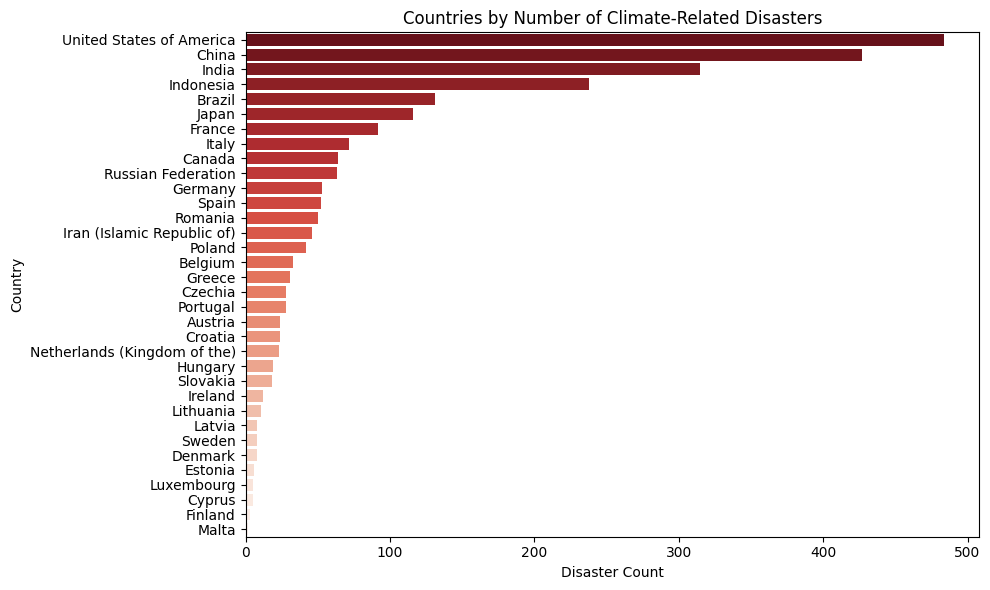

/tmp/ipython-input-9-3355183022.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




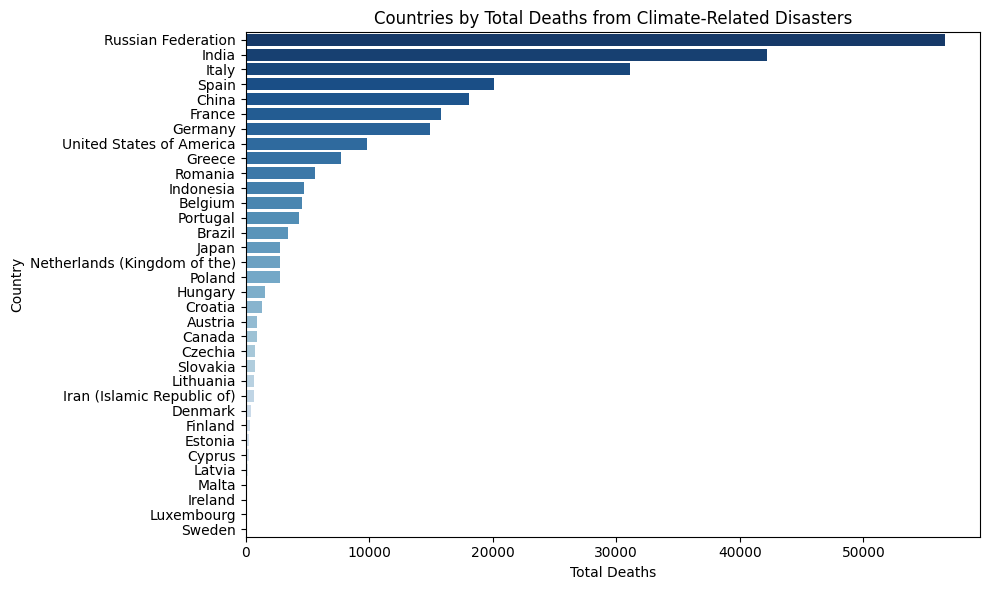

/tmp/ipython-input-9-3355183022.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




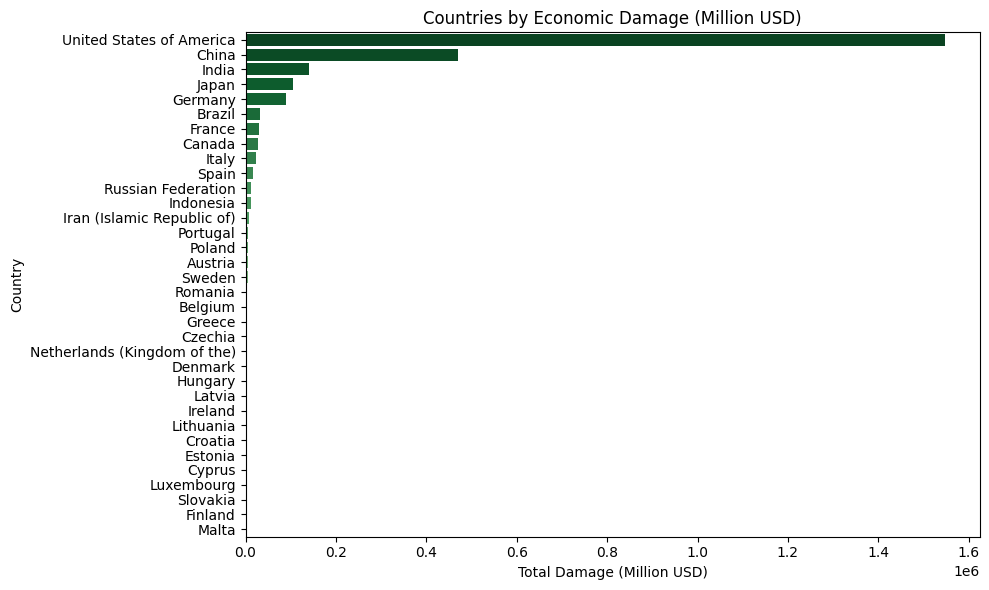

In [9]:
# Count Data
# Sort by count and take top 15
top_disasters = summary.sort_values("Disaster Count", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_disasters, x="Disaster Count", y="Country", palette="Reds_r")
plt.title("Countries by Number of Climate-Related Disasters")
plt.xlabel("Disaster Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Death Data
top_deaths = summary.sort_values("Total Deaths", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_deaths, x="Total Deaths", y="Country", palette="Blues_r")
plt.title("Countries by Total Deaths from Climate-Related Disasters")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# Damage Data
top_damage = summary.sort_values("Total Damage (Million USD)", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_damage, x="Total Damage (Million USD)", y="Country", palette="Greens_r")
plt.title("Countries by Economic Damage (Million USD)")
plt.xlabel("Total Damage (Million USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


Summary Statistics

In [10]:
print(f"Number of countries: {df_climate['Country'].nunique()}")
print(f"Time period: {df_climate['Year'].min()} to {df_climate['Year'].max()}")
print(f"Total number of disaster events: {len(df_climate)}")

df_climate[[
    "Total Deaths",
    "Total Affected",
    "Total Damage, Adjusted ('000 US$)"
]].describe().round(2).T

df_climate["Total Damage (Million USD)"] = df_climate["Total Damage, Adjusted ('000 US$)"] / 1000

df_climate[[
    "Total Deaths",
    "Total Affected",
    "Total Damage (Million USD)"
]].describe().round(2).T


Number of countries: 34
Time period: 2005 to 2025
Total number of disaster events: 2541


count        mean          std  min     25%  \
Total Deaths                1996.0      128.78      1425.70  1.0    4.00   
Total Affected              1725.0  1119448.01  10060740.66  1.0  394.00   
Total Damage (Million USD)  1127.0     2266.97      9066.28  0.7  125.38   

                               50%       75%           max  
Total Deaths                  12.0     32.25  5.573600e+04  
Total Affected              4000.0  50650.00  3.300000e+08  
Total Damage (Million USD)   438.8   1596.28  1.950299e+05

Time series of Total Damage by Region

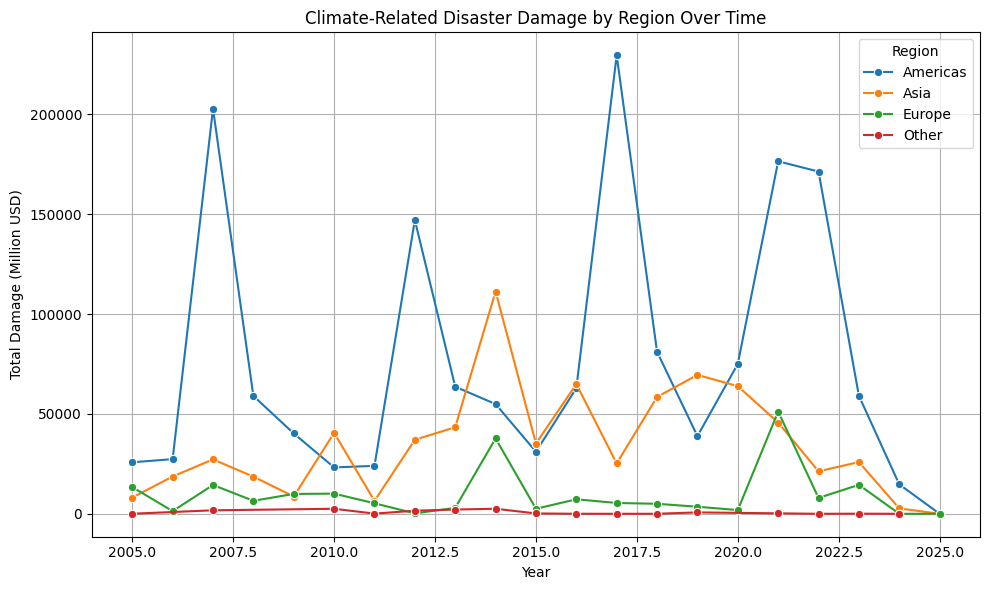

In [14]:
region_ts = df_climate.groupby(["Year", "Region"])["Total Damage (Million USD)"].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=region_ts, x="Year", y="Total Damage (Million USD)", hue="Region", marker="o")

plt.title("Climate-Related Disaster Damage by Region Over Time")
plt.xlabel("Year")
plt.ylabel("Total Damage (Million USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



Time series of Total Damage by Top 5 Countries

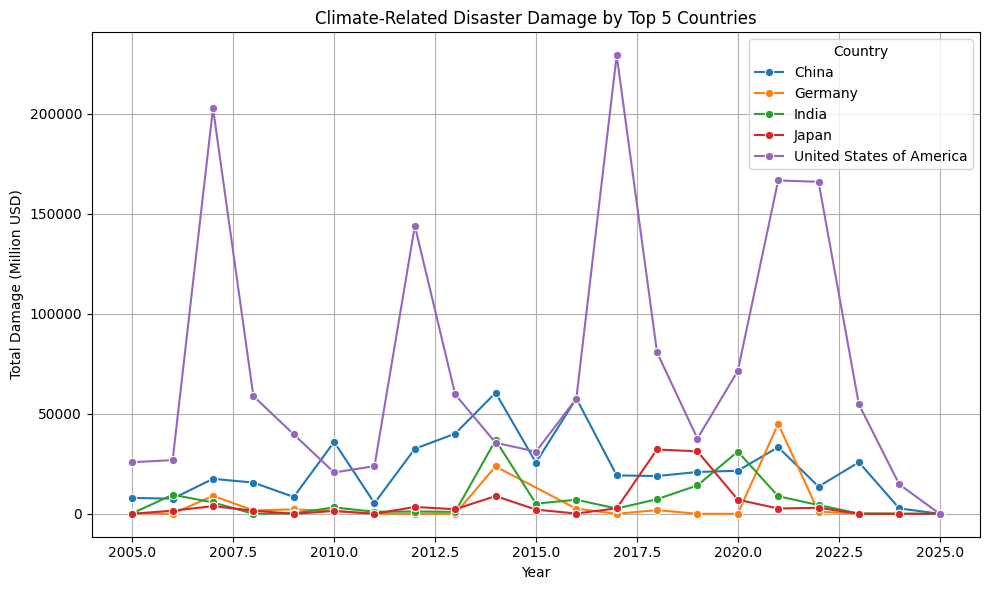

In [12]:
# Total damage by country (across all years)
top_damage_countries = df_climate.groupby("Country")["Total Damage (Million USD)"].sum()\
    .sort_values(ascending=False).head(5).index.tolist()
# Group yearly damage for selected countries
damage_top_countries = df_climate[df_climate["Country"].isin(top_damage_countries)]\
    .groupby(["Year", "Country"])["Total Damage (Million USD)"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=damage_top_countries, x="Year", y="Total Damage (Million USD)", hue="Country", marker="o")
plt.title("Climate-Related Disaster Damage by Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Total Damage (Million USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


Case Studies

In [16]:
# Top Damage Countries
df_climate.sort_values("Total Damage (Million USD)", ascending=False).head(5)[
    ["Country", "Year", "Disaster Type", "Disaster Subtype", "Total Damage (Million USD)", "Total Deaths"]
]

Country  Year Disaster Type  Disaster Subtype  \
185   United States of America  2007         Storm  Tropical cyclone   
2776  United States of America  2017         Storm  Tropical cyclone   
3750  United States of America  2022         Storm  Tropical cyclone   
3530  United States of America  2021         Storm  Tropical cyclone   
2782  United States of America  2017         Storm  Tropical cyclone   

      Total Damage (Million USD)  Total Deaths  
185                   195029.889        1833.0  
2776                  118091.963          88.0  
3750                  104116.407         152.0  
3530                   73091.612          96.0  
2782                   70855.178          97.0

The United States overwhelmingly dominates the top five most expensive climate disasters, all involving tropical cyclones (hurricanes).

1. 2007 stands out with nearly $200 billion in damages and 1,833 deaths, likely representing Hurricane Katrina’s aftermath or similar mega-events.

1. 2017 appears twice, representing multiple hurricanes-probably Harvey, Irma, and Maria causing over $188 billion combined.

1. Despite the large economic impact, the death tolls (besides 2007) remain
comparatively moderate, indicating strong infrastructure and disaster preparedness.



In [13]:
# Top Death Countries
df_climate.sort_values("Total Deaths", ascending=False).head(5)[
    ["Country", "Year", "Disaster Type", "Disaster Subtype", "Total Damage (Million USD)", "Total Deaths"]
]

Country  Year        Disaster Type Disaster Subtype  \
1360  Russian Federation  2010  Extreme temperature        Heat wave   
3717               Italy  2023  Extreme temperature        Heat wave   
3904               Italy  2023  Extreme temperature        Heat wave   
3709               Spain  2022  Extreme temperature        Heat wave   
3896               Spain  2023  Extreme temperature        Heat wave   

      Total Damage (Million USD)  Total Deaths  
1360                     558.943       55736.0  
3717                         NaN       18010.0  
3904                         NaN       12743.0  
3709                         NaN       11324.0  
3896                         NaN        8352.0

1. The deadliest climate disaster in the dataset occurred in Russia (2010) with a heatwave killing over 55,000 people — the single largest loss of life from a climate-related event.

2. In 2023, a cluster of extreme heat events in Italy and Spain caused massive
fatalities (8k–18k), although economic damages were not recorded (NaN). This suggests that heatwaves, while less visible in economic metrics, are profoundly lethal, especially in aging or vulnerable populations.

These findings highlight how economic damage and human death tolls don’t always align: the US suffers more financial loss, but countries like Russia and southern Europe suffer more in human terms.

Importing GHG Dataset

In [14]:
# Load a specific sheet
df_totals = pd.read_excel("../data/raw/EDGAR_2024_GHG_booklet_2024.xlsx", sheet_name='GHG_totals_by_country')
df_sector = pd.read_excel("../data/raw/EDGAR_2024_GHG_booklet_2024.xlsx", sheet_name='GHG_by_sector_and_country')
df_gdp = pd.read_excel("../data/raw/EDGAR_2024_GHG_booklet_2024.xlsx", sheet_name='GHG_per_GDP_by_country')
df_capita = pd.read_excel("../data/raw/EDGAR_2024_GHG_booklet_2024.xlsx", sheet_name='GHG_per_capita_by_country')
# Preview
print(df_totals.head())

  EDGAR Country Code                 Country        1970        1971  \
0                ABW                   Aruba    0.036713    0.041538   
1                AFG             Afghanistan   15.437430   15.364077   
2                AGO                  Angola   18.998763   18.866057   
3                AIA                Anguilla    0.003355    0.003396   
4                AIR  International Aviation  172.478021  172.465452   

         1972        1973        1974        1975        1976        1977  \
0    0.052391    0.057360    0.056630    0.070743    0.069793    0.080624   
1   13.316628   13.934875   15.177862   15.843058   15.943325   16.088215   
2   21.459002   23.018941   23.685423   22.519608   18.586243   23.251029   
3    0.003534    0.003411    0.003694    0.003968    0.003833    0.003960   
4  182.459819  190.296910  183.162104  177.165836  177.483077  193.593366   

   ...        2014        2015        2016        2017        2018  \
0  ...    0.469468    0.490990    

In [15]:
# Print unique country names from the disaster dataset
print("Disaster Dataset Countries:")
print(df["Country"].dropna().unique())

# Print unique country names from the GHG emission dataset
print("\nGHG Dataset Countries:")
print(df_totals["Country"].dropna().unique())

Disaster Dataset Countries:
['China' 'Brazil' 'Iran (Islamic Republic of)' 'Italy'
 'United States of America' 'Germany' 'Denmark' 'Estonia' 'Ireland'
 'Lithuania' 'Latvia' 'Netherlands (Kingdom of the)' 'Poland'
 'Russian Federation' 'Sweden' 'India' 'Indonesia' 'Czechia' 'Croatia'
 'Hungary' 'Romania' 'Spain' 'Japan' 'Slovakia' 'France' 'Finland'
 'Austria' 'Portugal' 'Canada' 'Greece' 'Malta' 'Belgium' 'Cyprus'
 'Luxembourg']

GHG Dataset Countries:
['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'International Aviation'
 'Albania' 'Curaçao' 'United Arab Emirates' 'Argentina' 'Armenia'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia'
 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland and Liechtenstein'
 'Chile' 'China' 'Côte d’Ivoire' 'Cameroon'
 'Democratic Republic of the Congo'

Cleaning Disaster Data to Merge with GHG

In [16]:
df_disaster=summary
df_disaster.head(10)
df_disaster = df_disaster.drop(columns=["hover_text", "customdata"])
df_disaster.head()

Country  Total Deaths  Total Affected  Total Damage, Adjusted ('000 US$)  \
0  Austria         966.0    4.179000e+03                          4836453.0   
1  Belgium        4574.0    1.059230e+05                          3600731.0   
2   Brazil        3399.0    5.491750e+07                         32853225.0   
3   Canada         961.0    4.510850e+05                         28451264.0   
4    China       18112.0    1.089552e+09                        470639750.0   

   Disaster Count  Total Damage (Million USD)    Region  
0              24                    4836.453        EU  
1              33                    3600.731        EU  
2             131                   32853.225  Americas  
3              64                   28451.264  Americas  
4             427                  470639.750      Asia

In [17]:
# Step 1: Filter EU countries from the disaster dataset
df_eu = df_disaster[df_disaster["Region"] == "EU"]

# Step 2: Aggregate relevant numeric columns
cols_to_sum = ["Total Deaths", "Total Affected", "Total Damage, Adjusted ('000 US$)",
               "Disaster Count", "Total Damage (Million USD)"]
eu_aggregated = df_eu[cols_to_sum].sum()

# Step 3: Create a new DataFrame row representing EU aggregate
eu_row = pd.DataFrame([{
    "Country": "EU27",
    "Region": "EU",
    "Total Deaths": eu_aggregated["Total Deaths"],
    "Total Affected": eu_aggregated["Total Affected"],
    "Total Damage, Adjusted ('000 US$)": eu_aggregated["Total Damage, Adjusted ('000 US$)"],
    "Disaster Count": eu_aggregated["Disaster Count"],
    "Total Damage (Million USD)": eu_aggregated["Total Damage (Million USD)"]
}])

# Step 4: Append the EU row without removing existing countries
df_disaster_with_eu = pd.concat([df_disaster, eu_row], ignore_index=True)

df_disaster_with_eu.head()
# Rename countries to match GHG
country_rename_map = {
    "United States of America": "United States",
    "Iran (Islamic Republic of)": "Iran",
    "Russian Federation": "Russia",
    'Netherlands (Kingdom of the)': "Netherlands",
    "Italy" : "Italy, San Marino and the Holy See",
    "Spain" : "Spain and Andorra",
    "France": "France and Monaco"
}
df_disaster_with_eu["Country"] = df_disaster_with_eu["Country"].replace(country_rename_map)
print(df_disaster_with_eu["Country"].unique())
print("Total number of unique countries:", df_disaster_with_eu["Country"].nunique())

['Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France and Monaco' 'Germany'
 'Greece' 'Hungary' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Italy, San Marino and the Holy See' 'Japan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Malta' 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Russia'
 'Slovakia' 'Spain and Andorra' 'Sweden' 'United States' 'EU27']
Total number of unique countries: 35


Lets combine with GHG datasets

In [18]:
print("\nGHG Dataset Countries:")
print(df_totals["Country"].dropna().unique())


GHG Dataset Countries:
['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'International Aviation'
 'Albania' 'Curaçao' 'United Arab Emirates' 'Argentina' 'Armenia'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia'
 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland and Liechtenstein'
 'Chile' 'China' 'Côte d’Ivoire' 'Cameroon'
 'Democratic Republic of the Congo' 'Congo' 'Cook Islands' 'Colombia'
 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Cayman Islands' 'Cyprus'
 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic'
 'Algeria' 'Ecuador' 'Egypt' 'Eritrea' 'Western Sahara'
 'Spain and Andorra' 'Estonia' 'Ethiopia' 'Finland' 'Fiji'
 'Falkland Islands' 'France and Monaco' 'Faroes' 'Gabon' 'United Kingdom'
 'Georgia' 'Ghana' 'Gibraltar' 'Guinea' 'Guadeloupe' 'The Gambia'

In [19]:
#Filter by focus country
focus_countries = df_disaster_with_eu["Country"].unique()

# GHG filtered
df_totals_filtered = df_totals[df_totals["Country"].isin(focus_countries)]
df_sector_filtered = df_sector[df_sector["Country"].isin(focus_countries)]
df_gdp_filtered = df_gdp[df_gdp["Country"].isin(focus_countries)]
df_capita_filtered = df_capita[df_capita["Country"].isin(focus_countries)]

print("\nGHG Dataset Countries:")
print(df_totals_filtered["Country"].dropna().unique())
print("Total number of unique countries:", df_totals_filtered["Country"].nunique())


GHG Dataset Countries:
['Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Cyprus' 'Czechia'
 'Germany' 'Denmark' 'Spain and Andorra' 'Estonia' 'Finland'
 'France and Monaco' 'Greece' 'Croatia' 'Hungary' 'Indonesia' 'India'
 'Ireland' 'Iran' 'Italy, San Marino and the Holy See' 'Japan' 'Lithuania'
 'Luxembourg' 'Latvia' 'Malta' 'Netherlands' 'Poland' 'Portugal' 'Romania'
 'Russia' 'Slovakia' 'Sweden' 'United States' 'EU27']
Total number of unique countries: 35


Rename Back

In [21]:
# Rename Countries Again
country_rename_map_reverse = {
    "Italy, San Marino and the Holy See" : "Italy",
    "Spain and Andorra": "Spain",
    "France and Monaco":"France"
}

df_totals_filtered.loc[:, "Country"] = df_totals_filtered["Country"].replace(country_rename_map_reverse)
df_sector_filtered.loc[:, "Country"] = df_sector_filtered["Country"].replace(country_rename_map_reverse)
df_gdp_filtered .loc[:, "Country"] = df_gdp_filtered ["Country"].replace(country_rename_map_reverse)
df_capita_filtered.loc[:, "Country"] = df_capita_filtered["Country"].replace(country_rename_map_reverse)

# Check
print(df_totals_filtered["Country"].dropna().unique())
print("Total number of unique countries:", df_totals_filtered["Country"].nunique())


['Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Cyprus' 'Czechia'
 'Germany' 'Denmark' 'Spain' 'Estonia' 'Finland' 'France' 'Greece'
 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iran' 'Italy' 'Japan'
 'Lithuania' 'Luxembourg' 'Latvia' 'Malta' 'Netherlands' 'Poland'
 'Portugal' 'Romania' 'Russia' 'Slovakia' 'Sweden' 'United States' 'EU27']
Total number of unique countries: 35


In [22]:
df_disaster_with_eu["Country"] = df_disaster_with_eu["Country"].replace(country_rename_map_reverse)
print("\nDisaster Dataset Countries:")
print(df_disaster_with_eu["Country"].dropna().unique())
print("Total number of unique countries:", df_disaster_with_eu["Country"].nunique())


Disaster Dataset Countries:
['Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'India' 'Indonesia' 'Iran' 'Ireland' 'Italy' 'Japan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'Poland' 'Portugal'
 'Romania' 'Russia' 'Slovakia' 'Spain' 'Sweden' 'United States' 'EU27']
Total number of unique countries: 35


Total GHG plus Disaster

In [23]:
# Merge disaster data with GHG totals
df_combined_totals = pd.merge(
    df_disaster_with_eu,
    df_totals_filtered,
    on="Country",
    how="inner"  # or "left" if you want to keep all disaster countries
)

# Drop EDGAR country code
df_combined_totals = df_combined_totals.drop(columns=["EDGAR Country Code"])

# Drop year columns before 2005
year_columns_to_drop = [col for col in df_combined_totals.columns if str(col).isdigit() and int(col) < 2005]
df_combined_totals = df_combined_totals.drop(columns=year_columns_to_drop)

# Choose columns for GHG emissions (assuming they are years)
ghg_years = [col for col in df_combined_totals.columns if str(col).isdigit() and int(col) >= 2005]
df_combined_totals["Total GHG Emissions"] = df_combined_totals[ghg_years].sum(axis=1)

# Removing outlier
# Filter out EU27
df_combined_totals = df_combined_totals[df_combined_totals["Country"] != "EU27"]
df_combined_totals

Country  Total Deaths  Total Affected  \
0         Austria         966.0    4.179000e+03   
1         Belgium        4574.0    1.059230e+05   
2          Brazil        3399.0    5.491750e+07   
3          Canada         961.0    4.510850e+05   
4           China       18112.0    1.089552e+09   
5         Croatia        1323.0    2.359500e+04   
6          Cyprus         260.0    6.190000e+02   
7         Czechia         777.0    1.574603e+06   
8         Denmark         448.0    3.000000e+00   
9         Estonia         281.0    1.000000e+02   
10        Finland         363.0    4.000000e+02   
11         France       15842.0    1.146856e+06   
12        Germany       14924.0    1.408200e+04   
13         Greece        7713.0    1.117280e+05   
14        Hungary        1577.0    2.574450e+05   
15          India       42165.0    6.307191e+08   
16      Indonesia        4737.0    2.765191e+07   
17           Iran         665.0    1.628801e+07   
18        Ireland          93.0    9.000000e+02   
19          Italy       31085.0    8.917500e+04   
20          Japan        2798.0    3.407060e+06   
21         Latvia         213.0    2.000000e+02   
22      Lithuania         672.0    0.000000e+00   
23     Luxembourg          77.0    1.519000e+03   
24          Malta         146.0    0.000000e+00   
25    Netherlands        2756.0    5.000000e+00   
26         Poland        2751.0    1.745990e+05   
27       Portugal        4352.0    5.355000e+04   
28        Romania        5652.0    1.441890e+05   
29         Russia       56609.0    4.117770e+05   
30       Slovakia         751.0    1.289000e+03   
31          Spain       20101.0    8.916000e+04   
32         Sweden          68.0    1.350000e+04   
33  United States        9832.0    1.038414e+08   

    Total Damage, Adjusted ('000 US$)  Disaster Count  \
0                        4.836453e+06            24.0   
1                        3.600731e+06            33.0   
2                        3.285322e+07           131.0   
3                        2.845126e+07            64.0   
4                        4.706398e+08           427.0   
5                        3.119240e+05            24.0   
6                        5.285100e+04             5.0   
7                        2.865496e+06            28.0   
8                        2.175267e+06             8.0   
9                        2.028310e+05             6.0   
10                       0.000000e+00             3.0   
11                       3.027376e+07            92.0   
12                       8.871445e+07            53.0   
13                       3.538895e+06            31.0   
14                       7.048440e+05            19.0   
15                       1.393963e+08           315.0   
16                       1.135139e+07           238.0   
17                       7.681262e+06            46.0   
18                       4.402440e+05            12.0   
19                       2.302423e+07            72.0   
20                       1.040010e+08           116.0   
21                       5.070780e+05             8.0   
22                       3.877560e+05            11.0   
23                       4.331800e+04             5.0   
24                       0.000000e+00             2.0   
25                       2.813298e+06            23.0   
26                       5.013284e+06            42.0   
27                       6.087518e+06            28.0   
28                       3.725191e+06            50.0   
29                       1.177789e+07            63.0   
30                       3.493400e+04            18.0   
31                       1.721293e+07            52.0   
32                       4.571154e+06             8.0   
33                       1.547582e+09           484.0   

    Total Damage (Million USD)    Region         2005         2006  \
0                     4836.453        EU    96.201541    93.767898   
1                     3600.731        EU   143.064575   139.567585   
2                 

In [24]:
df = df_combined_totals.copy()

# Detect year columns (numerical)
year_cols = [col for col in df.columns if isinstance(col, int) and 2005 <= col <= 2023]
id_vars = ['Country', 'Region', 'Disaster Count']

# Melt into long format
df_long = df.melt(id_vars=id_vars, value_vars=year_cols,
                  var_name='Year', value_name='GHG_Emission')

# Convert data types
df_long['Year'] = df_long['Year'].astype(int)
df_long['Region'] = df_long['Region'].astype('category')

# Drop missing
df_long = df_long.dropna(subset=['GHG_Emission', 'Disaster Count'])

# Preview

df_long['log_GHG'] = np.log(df_long['GHG_Emission'])

print(df_long.head())

   Country    Region  Disaster Count  Year  GHG_Emission   log_GHG
0  Austria        EU            24.0  2005     96.201541  4.566445
1  Belgium        EU            33.0  2005    143.064575  4.963296
2   Brazil  Americas           131.0  2005   1025.421472  6.932859
3   Canada  Americas            64.0  2005    750.948366  6.621337
4    China      Asia           427.0  2005   8191.085964  9.010802


Disaster Count ~ log(GHG_Emission) + Region


In [25]:
model_log = smf.ols('Q("Disaster Count") ~ log_GHG + C(Region)', data=df_long).fit()
print(model_log.summary())

                             OLS Regression Results                            
Dep. Variable:     Q("Disaster Count")   R-squared:                       0.608
Model:                             OLS   Adj. R-squared:                  0.607
Method:                  Least Squares   F-statistic:                     332.6
Date:                 Thu, 26 Jun 2025   Prob (F-statistic):          3.00e-130
Time:                         02:20:30   Log-Likelihood:                -3681.6
No. Observations:                  646   AIC:                             7371.
Df Residuals:                      642   BIC:                             7389.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.0758

# Interpretation

*   Intercept: -4.08  (Baseline disaster count when
log(GHG)=0 and region = Americas. Not meaningful in real-world terms since log(GHG)=0 is unrealistic)
*   log_GHG: 30.78 ( Highly significant. A 1% increase in GHG emissions (approx. +0.01 in log) increases the number of disasters by 30.78⋅log(1.01)≈30.78⋅0.00995≈0.31 disaster count.
*   Region= Asia = -30.36 ~ meaning that Asia has 30 fewer disasters per year than Americas
*   Region= EU ~ meaning that EU has 100 fewer disasters than those in Americas

R-squared = 0.608  The model explains 60.8% of the variation in disaster counts.

#“A 1% increase in GHG emissions is associated with ~0.31 more disasters per country per year”




# Predicted Vs Actual Disaster Counts

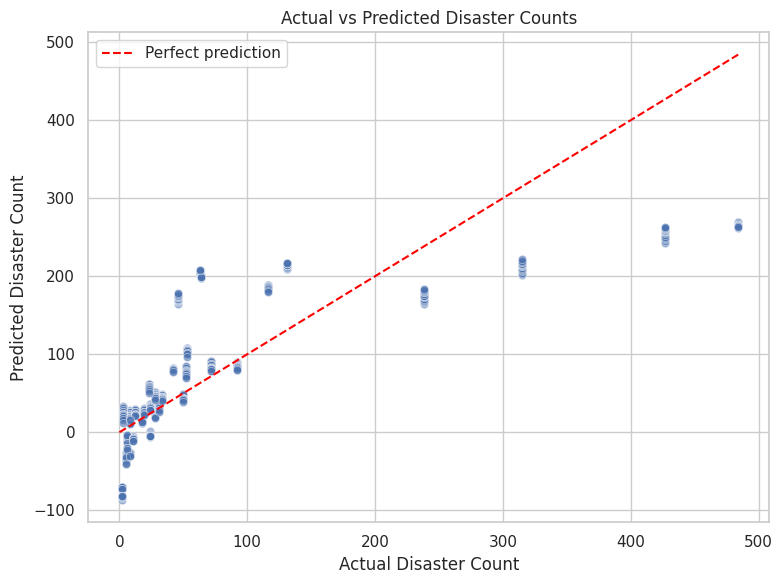

In [38]:
df_long['predicted'] = model_log.predict(df_long)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Disaster Count', y='predicted', data=df_long, alpha=0.6)

# 45-degree reference line
max_val = max(df_long['Disaster Count'].max(), df_long['predicted'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual Disaster Count')
plt.ylabel('Predicted Disaster Count')
plt.title('Actual vs Predicted Disaster Counts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

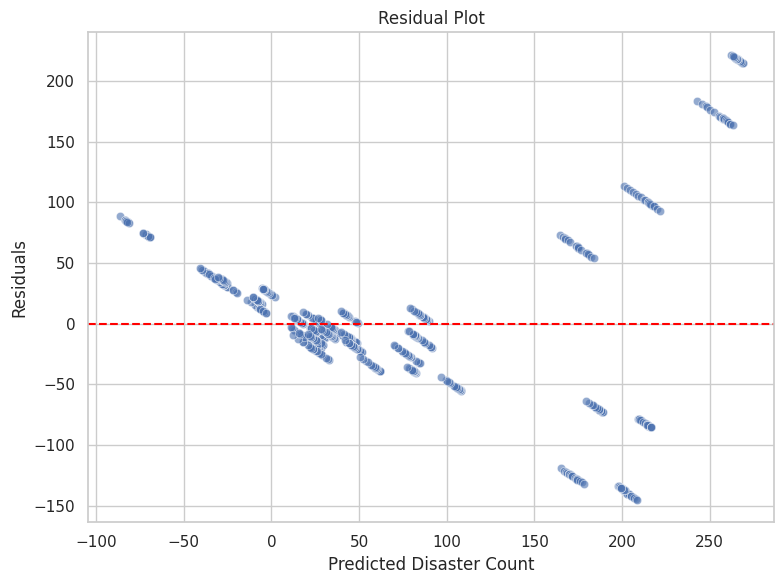

In [39]:
# Create residuals column
df_long['residuals'] = df_long['Disaster Count'] - df_long['predicted']


plt.figure(figsize=(8, 6))
sns.scatterplot(x='predicted', y='residuals', data=df_long, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Disaster Count')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


# Interpretation

*   A clear curved pattern — looks like a parabola or “smile” shape
*  Systematic deviation: residuals start positive, go negative, then back positive as predicted values increase



*   Non-linearity is still present:Current model (log(GHG) + Region) is not fully capturing the underlying functional form of disaster counts.
*   The U-shape suggests you might be underfitting at low and high GHG levels.



# Log Square Regression

In [47]:
# Add squared log_GHG
df_long['log_GHG_sq'] = df_long['log_GHG'] ** 2

# Fit polynomial OLS model
model_poly = smf.ols('Q("Disaster Count") ~ log_GHG + log_GHG_sq + C(Region)', data=df_long).fit()
print(model_poly.summary())

                             OLS Regression Results                            
Dep. Variable:     Q("Disaster Count")   R-squared:                       0.805
Model:                             OLS   Adj. R-squared:                  0.803
Method:                  Least Squares   F-statistic:                     660.3
Date:                 Thu, 26 Jun 2025   Prob (F-statistic):          1.18e-225
Time:                         02:58:35   Log-Likelihood:                -3456.9
No. Observations:                  646   AIC:                             6924.
Df Residuals:                      641   BIC:                             6946.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           140.8913

# Interpretation


*   R squared- 0.805 (About 80 percent of the disaster count can be explained by the model.
*   ghg= 28.2 MtCo2eq is the maximum when disaster count is zero. Below that point, disasters decrease and above that point, disaster increases with quadratic term.

*   Asia has 42.3397 less disaster than Americas and the effect is siginificant.


# Poisson Regression

In [42]:
# Fit Poisson regression
model_poisson = smf.poisson('Q("Disaster Count") ~ log_GHG + C(Region)', data=df_long).fit()
print(model_poisson.summary())

Optimization terminated successfully.
         Current function value: 9.786291
         Iterations 7
                           Poisson Regression Results                          
Dep. Variable:     Q("Disaster Count")   No. Observations:                  646
Model:                         Poisson   Df Residuals:                      642
Method:                            MLE   Df Model:                            3
Date:                 Thu, 26 Jun 2025   Pseudo R-squ.:                  0.8404
Time:                         02:34:07   Log-Likelihood:                -6321.9
converged:                        True   LL-Null:                       -39619.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9389      0.035     26.513      0.000       0.869       1.008


# Interpretation

*   (pseudo R² = 0.84) indicates the independent variables explain disaster counts well.
*    A 1-unit increase in log(GHG) is associated with a 78.3% increase in expected disaster counts. (e^0.5786≈1.783)
*   A 1% increase in GHG is associated with about a 0.58% increase in the expected number of disasters. (Δlog(Expected Count)=0.5786⋅0.00995≈0.00576, e^0.00576≈1.0058)
*   Region Asia has 20.2 % fewer disaster than Americas (Asia: 𝑒^−0.2258≈0.798= ~20.2% fewer disasters)
*   Region EU has 33.9% fewer disaster than Americas (EU: 𝑒^−0.4131≈0.661= ~33.9% fewer disasters)




# For Plotting Prediction and Residuals


In [43]:
# OLS Polynomial Predictions & Residuals
df_long['pred_ols'] = model_poly.predict(df_long)
df_long['resid_ols'] = df_long['Disaster Count'] - df_long['pred_ols']

# Poisson Predictions & Residuals
df_long['pred_poisson'] = model_poisson.predict(df_long)
df_long['resid_poisson'] = df_long['Disaster Count'] - df_long['pred_poisson']

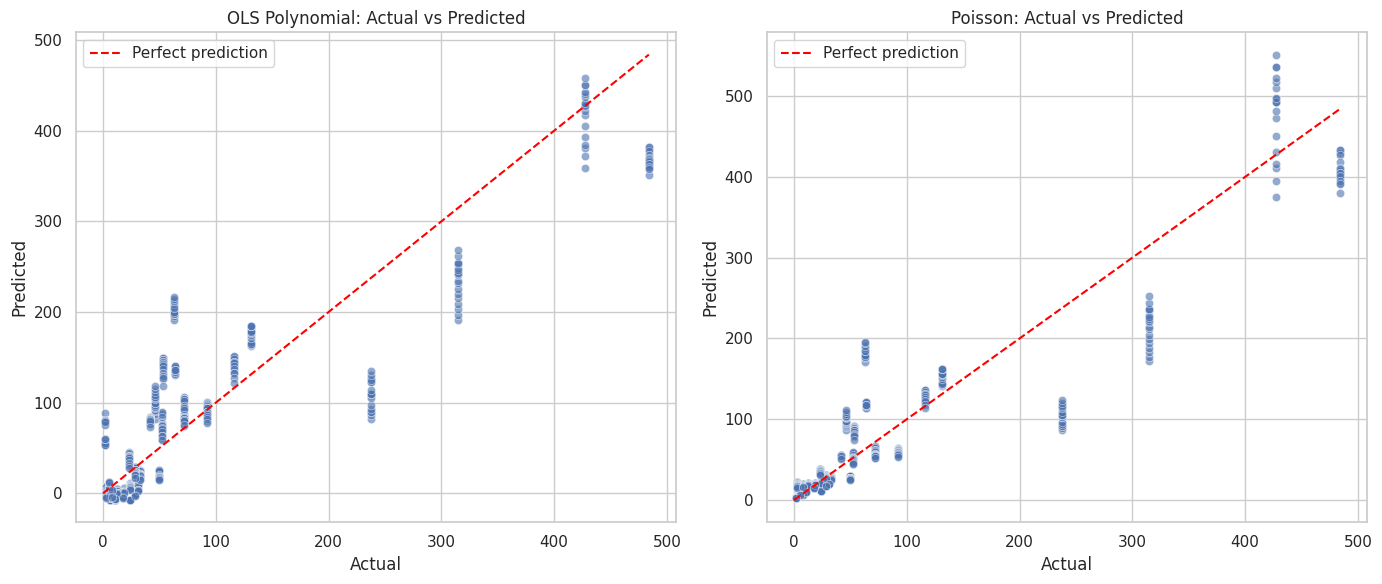

In [44]:
plt.figure(figsize=(14, 6))

# OLS
plt.subplot(1, 2, 1)
sns.scatterplot(x='Disaster Count', y='pred_ols', data=df_long, alpha=0.6)
plt.plot([0, df_long['Disaster Count'].max()], [0, df_long['Disaster Count'].max()],
         linestyle='--', color='red', label='Perfect prediction')
plt.title('OLS Polynomial: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Poisson
plt.subplot(1, 2, 2)
sns.scatterplot(x='Disaster Count', y='pred_poisson', data=df_long, alpha=0.6)
plt.plot([0, df_long['Disaster Count'].max()], [0, df_long['Disaster Count'].max()],
         linestyle='--', color='red', label='Perfect prediction')
plt.title('Poisson: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()




*   Both models follow the diagonal fairly well, but Poisson predictions are tighter for low and mid ranges.

*   Polynomial OLS does a decent job too, especially after including the squared term. Especially for middle range



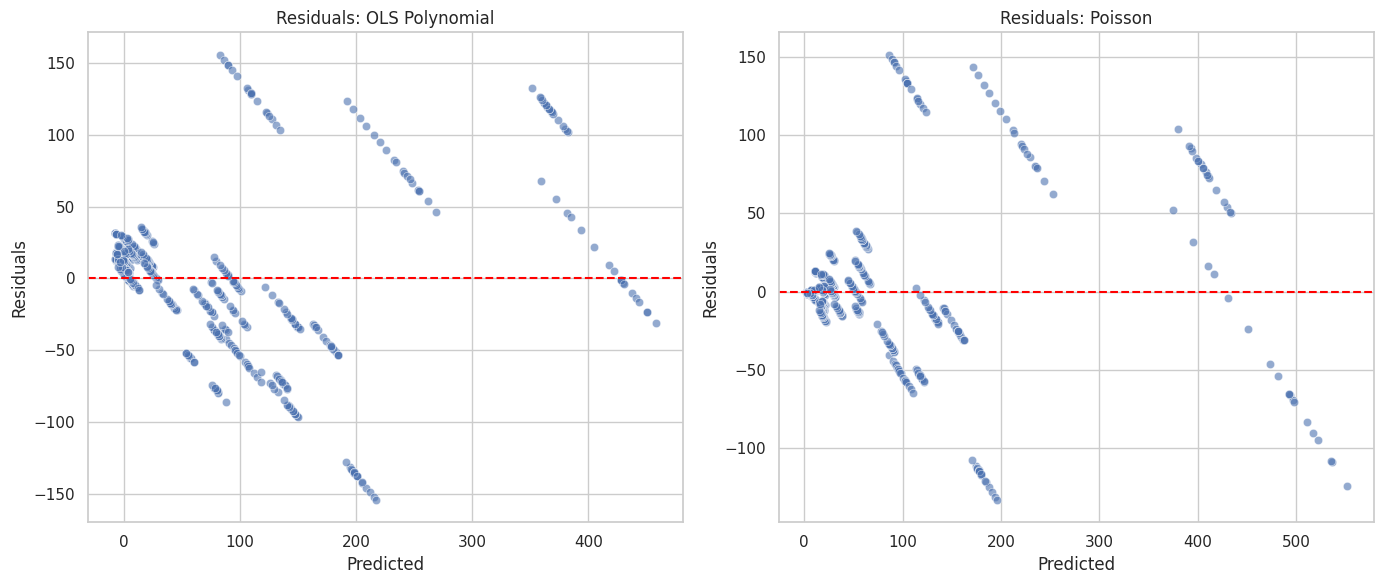

In [45]:
plt.figure(figsize=(14, 6))

# OLS Residuals
plt.subplot(1, 2, 1)
sns.scatterplot(x='pred_ols', y='resid_ols', data=df_long, alpha=0.6)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals: OLS Polynomial')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Poisson Residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x='pred_poisson', y='resid_poisson', data=df_long, alpha=0.6)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals: Poisson')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


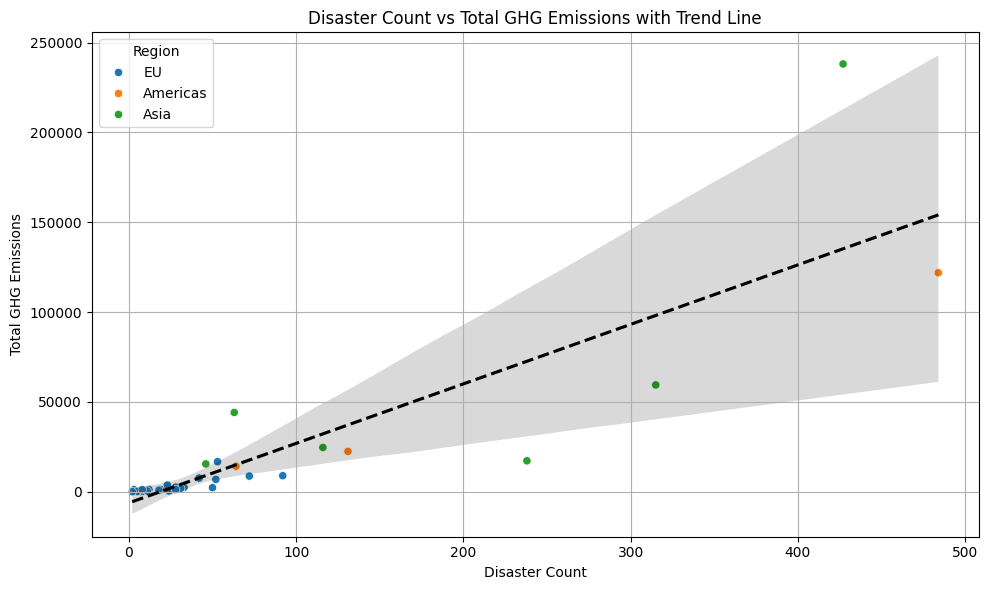

In [26]:
# Step 1: Drop rows with NaNs only for the numeric columns used in regplot
df_clean = df_combined_totals[["Disaster Count", "Total GHG Emissions"]].dropna()
df_clean = df_clean.astype({"Disaster Count": float, "Total GHG Emissions": float})

# Step 2: Plot
plt.figure(figsize=(10, 6))

# Full dataset (with Region hue)
sns.scatterplot(data=df_combined_totals, x="Disaster Count", y="Total GHG Emissions", hue="Region")

# Trend line using only clean subset
sns.regplot(
    data=df_clean,
    x="Disaster Count",
    y="Total GHG Emissions",
    scatter=False,
    color='black',
    line_kws={"linestyle": "--"}
)

plt.title("Disaster Count vs Total GHG Emissions with Trend Line")
plt.grid(True)
plt.tight_layout()
plt.show()


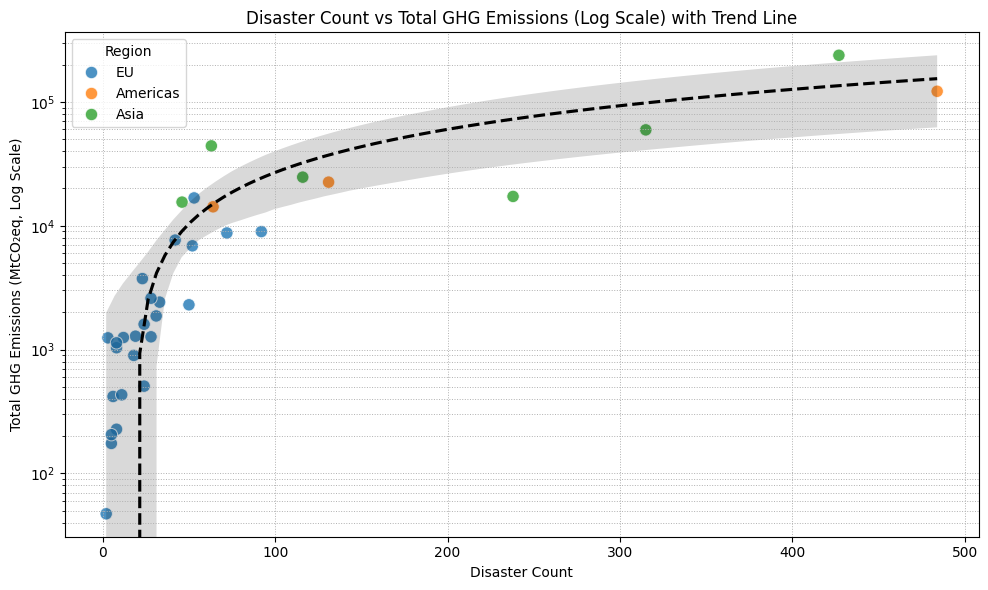

In [27]:
# Step 1: Ensure numeric conversion and drop NaNs for regplot
df_combined_totals["Disaster Count"] = pd.to_numeric(df_combined_totals["Disaster Count"], errors="coerce")
df_combined_totals["Total GHG Emissions"] = pd.to_numeric(df_combined_totals["Total GHG Emissions"], errors="coerce")

# Cleaned subset for regression line only
df_clean = df_combined_totals.dropna(subset=["Disaster Count", "Total GHG Emissions"]).copy()
df_clean = df_clean[df_clean["Total GHG Emissions"] > 0]  # Avoid log(0)

# Step 2: Plot
plt.figure(figsize=(10, 6))

# Scatter plot with hue by region
sns.scatterplot(
    data=df_combined_totals,
    x="Disaster Count",
    y="Total GHG Emissions",
    hue="Region",
    alpha=0.8,
    s=80
)

# Add regression line on cleaned numeric subset
sns.regplot(
    data=df_clean,
    x="Disaster Count",
    y="Total GHG Emissions",
    scatter=False,
    color='black',
    line_kws={"linestyle": "--"}
)

# Step 3: Log scale and formatting
plt.yscale("log")
plt.title("Disaster Count vs Total GHG Emissions (Log Scale) with Trend Line")
plt.xlabel("Disaster Count")
plt.ylabel("Total GHG Emissions (MtCO₂eq, Log Scale)")
plt.grid(True, which='both', linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

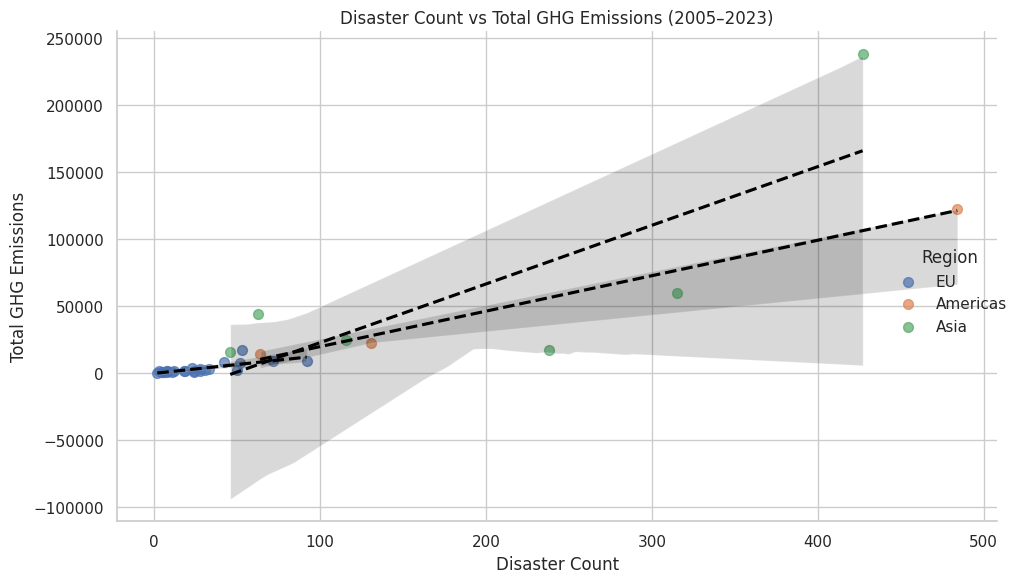

In [28]:
# Plot
sns.set(style="whitegrid")
g = sns.lmplot(
    data=df_clean,
    x="Disaster Count",
    y="Total GHG Emissions",
    hue="Region",
    height=6,
    aspect=1.5,
    scatter_kws={"s": 50, "alpha": 0.7},
    line_kws={"color": "black", "linestyle": "--"}
)

plt.title("Disaster Count vs Total GHG Emissions (2005–2023)")
plt.grid(True)
plt.tight_layout()
plt.show()

Overall trend, Asia is the most impacted by GHG and climate change.

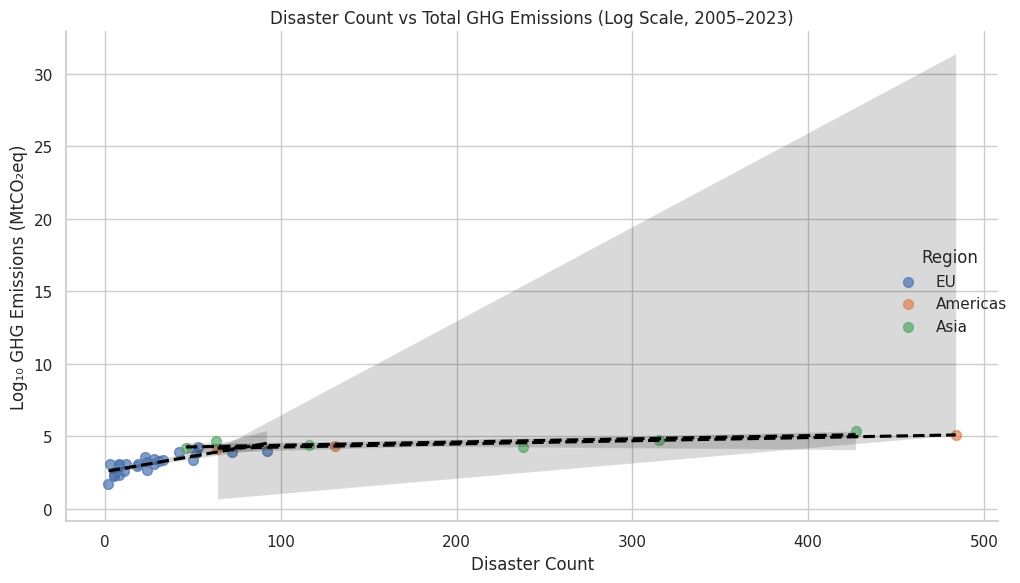

In [29]:
# Step 1: Ensure numeric types and clean the data
df_clean = df_combined_totals.copy()
df_clean["Disaster Count"] = pd.to_numeric(df_clean["Disaster Count"], errors="coerce")
df_clean["Total GHG Emissions"] = pd.to_numeric(df_clean["Total GHG Emissions"], errors="coerce")
df_clean = df_clean.dropna(subset=["Disaster Count", "Total GHG Emissions", "Region"])

# Step 2: Apply log10 to Total GHG Emissions
df_clean["Log GHG Emissions"] = df_clean["Total GHG Emissions"].apply(lambda x: np.log10(x) if x > 0 else np.nan)
df_clean = df_clean.dropna(subset=["Log GHG Emissions"])  # Remove log errors (e.g., log(0))

# Step 3: Plot using lmplot
sns.set(style="whitegrid")
g = sns.lmplot(
    data=df_clean,
    x="Disaster Count",
    y="Log GHG Emissions",
    hue="Region",
    height=6,
    aspect=1.5,
    scatter_kws={"s": 50, "alpha": 0.7},
    line_kws={"color": "black", "linestyle": "--"}
)

plt.title("Disaster Count vs Total GHG Emissions (Log Scale, 2005–2023)")
plt.xlabel("Disaster Count")
plt.ylabel("Log₁₀ GHG Emissions (MtCO₂eq)")
plt.grid(True)
plt.tight_layout()
plt.show()

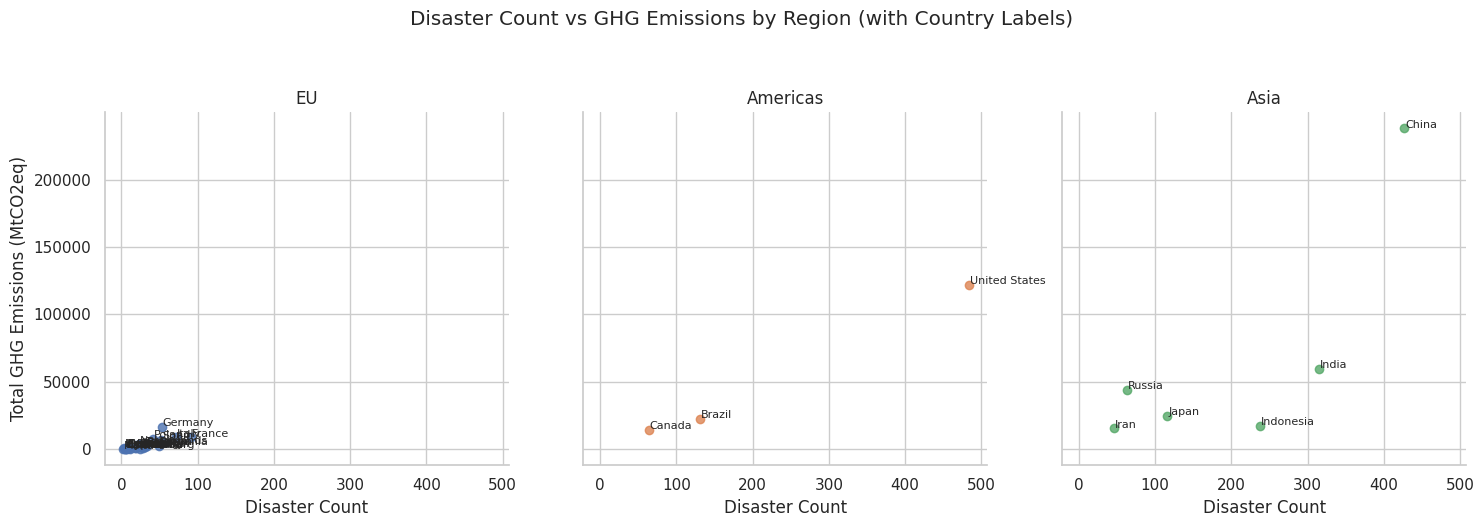

In [30]:
# Set figure style
sns.set(style="whitegrid")

# Create the facet plot by Region
g = sns.lmplot(
    data=df_combined_totals,
    x="Disaster Count",
    y="Total GHG Emissions",
    col="Region",      # Facet by region
    hue="Region",      # Color by region (optional here)
    fit_reg=False,     # Don't show regression lines now
    height=5,
    aspect=1
)

# Add country labels to each subplot
for ax, region in zip(g.axes.flat, df_combined_totals["Region"].unique()):
    subset = df_combined_totals[df_combined_totals["Region"] == region]
    for i, row in subset.iterrows():
        ax.text(row["Disaster Count"] + 1, row["Total GHG Emissions"] + 500,
                row["Country"], fontsize=8)

# Set titles and layout
g.set_titles("{col_name}")
g.set_axis_labels("Disaster Count", "Total GHG Emissions (MtCO2eq)")
plt.suptitle("Disaster Count vs GHG Emissions by Region (with Country Labels)", y=1.05)
plt.tight_layout()
plt.show()


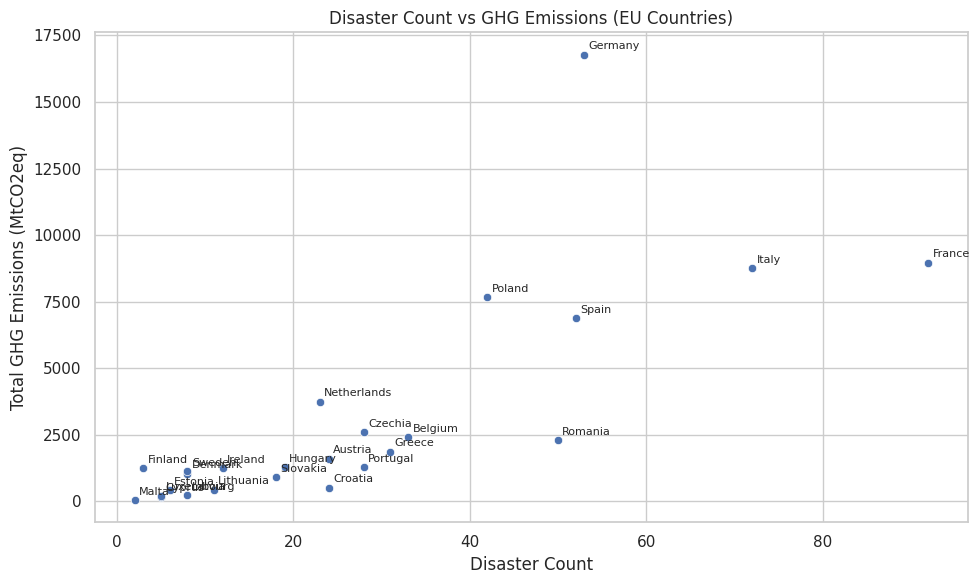

In [31]:
# Filter just EU countries
df_eu = df_combined_totals[df_combined_totals["Region"] == "EU"]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_eu, x="Disaster Count", y="Total GHG Emissions"
)

# Label countries
for i, row in df_eu.iterrows():
    plt.text(row["Disaster Count"] + 0.5, row["Total GHG Emissions"] + 200,
             row["Country"], fontsize=8)

plt.title("Disaster Count vs GHG Emissions (EU Countries)")
plt.xlabel("Disaster Count")
plt.ylabel("Total GHG Emissions (MtCO2eq)")
plt.tight_layout()
plt.show()


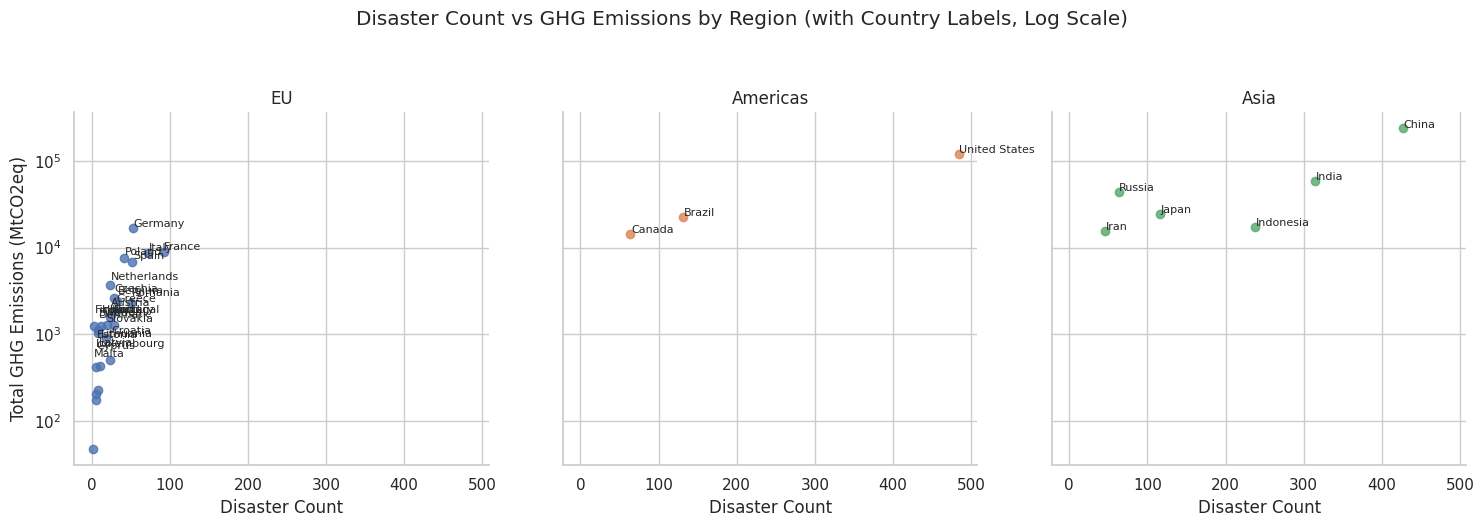

In [33]:
# 1. Set figure style
sns.set(style="whitegrid")

# 2. Create the facet plot by Region
g = sns.lmplot(
    data=df_combined_totals,
    x="Disaster Count",
    y="Total GHG Emissions",
    col="Region",         # Facet by region
    hue="Region",         # Color by region
    fit_reg=False,        # Don't show regression lines
    height=5,
    aspect=1
)

# 3. Add country labels and apply log scale to y-axis
for ax, region in zip(g.axes.flat, df_combined_totals["Region"].unique()):
    subset = df_combined_totals[df_combined_totals["Region"] == region]

    for i, row in subset.iterrows():
        ax.text(row["Disaster Count"] + 1,
                row["Total GHG Emissions"] + 500,
                row["Country"], fontsize=8)

    # Apply log scale to the y-axis
    ax.set_yscale("log")

# 4. Set titles and layout
g.set_titles("{col_name}")
g.set_axis_labels("Disaster Count", "Total GHG Emissions (MtCO2eq)")
plt.suptitle("Disaster Count vs GHG Emissions by Region (with Country Labels, Log Scale)", y=1.05)
plt.tight_layout()
plt.show()


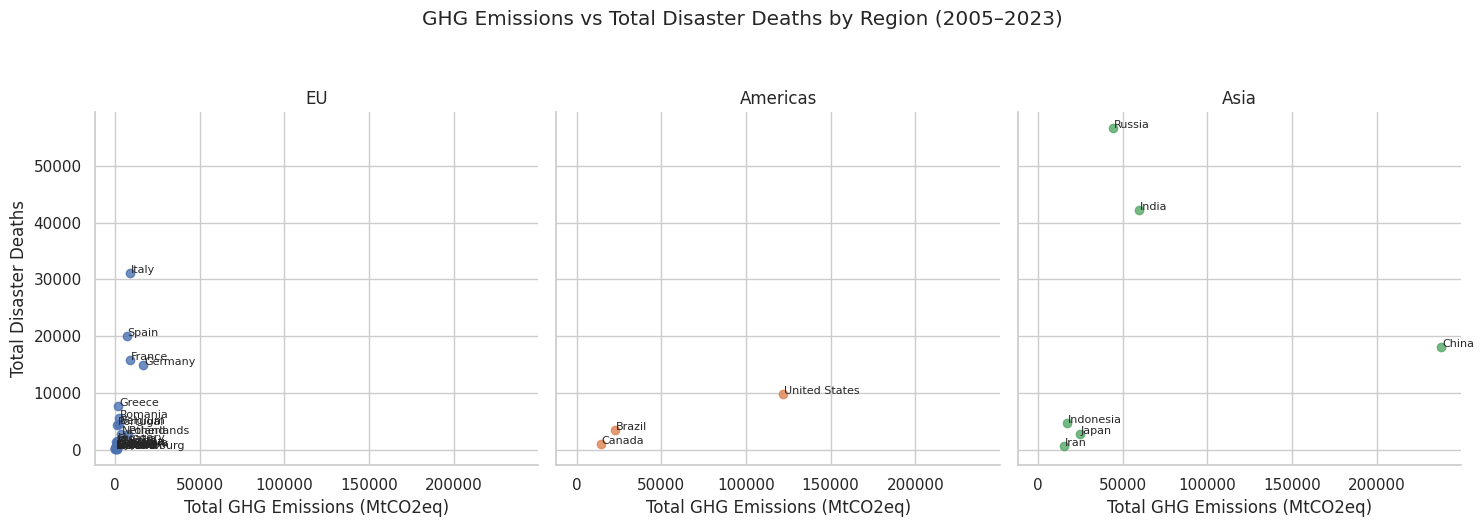

In [39]:
# Death by GHGs
sns.set(style="whitegrid")

# Create the facet plot by region
g = sns.lmplot(
    data=df_combined_totals,
    x="Total GHG Emissions",
    y="Total Deaths",
    col="Region",            # Facet by Region
    hue="Region",            # Optional for color
    fit_reg=False,           # Don't show regression lines
    height=5,
    aspect=1
)

# Add country labels
for ax, region in zip(g.axes.flat, df_combined_totals["Region"].unique()):
    subset = df_combined_totals[df_combined_totals["Region"] == region]
    for i, row in subset.iterrows():
        ax.text(row["Total GHG Emissions"] + 500, row["Total Deaths"], row["Country"], fontsize=8)

# Set axis labels and title
g.set_titles("{col_name}")
g.set_axis_labels("Total GHG Emissions (MtCO2eq)", "Total Disaster Deaths")
plt.suptitle("GHG Emissions vs Total Disaster Deaths by Region (2005–2023)", y=1.05)
plt.tight_layout()
plt.show()


So there is no direct connection to deaath by GHG.

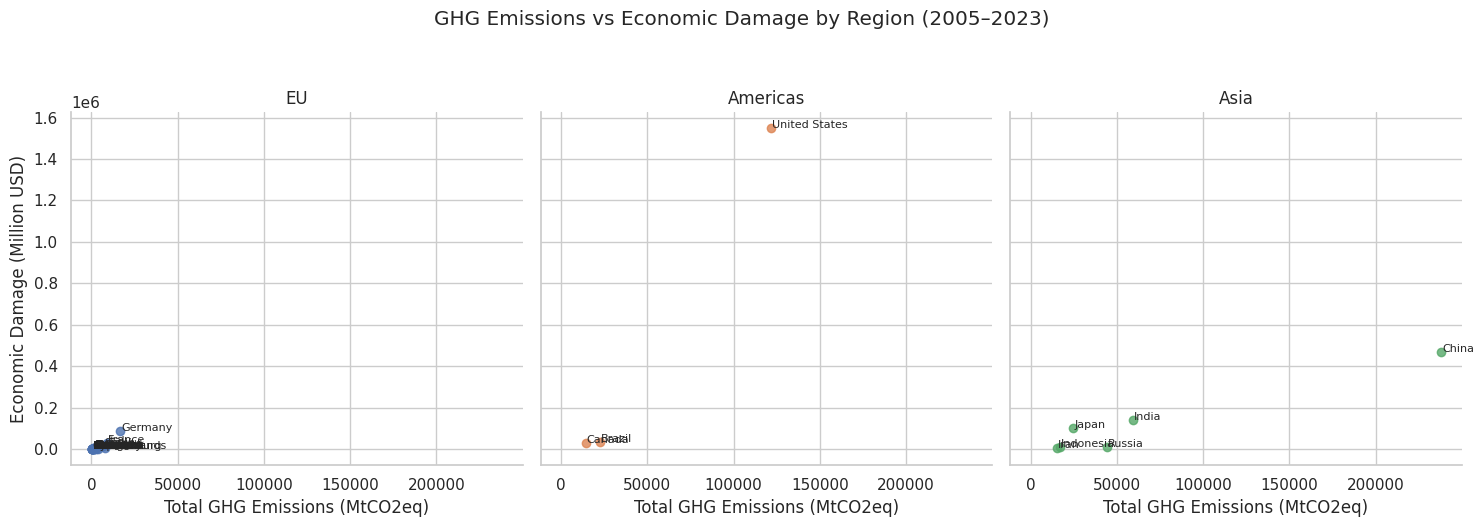

In [34]:
sns.set(style="whitegrid")

# Plot: GHG Emissions vs Economic Damage (faceted by Region)
g = sns.lmplot(
    data=df_combined_totals,
    x="Total GHG Emissions",
    y="Total Damage (Million USD)",
    col="Region",
    hue="Region",
    fit_reg=False,
    height=5,
    aspect=1
)

# Add country labels
for ax, region in zip(g.axes.flat, df_combined_totals["Region"].unique()):
    subset = df_combined_totals[df_combined_totals["Region"] == region]
    for i, row in subset.iterrows():
        ax.text(
            row["Total GHG Emissions"] + 500,
            row["Total Damage (Million USD)"] + 500,
            row["Country"],
            fontsize=8
        )

# Titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Total GHG Emissions (MtCO2eq)", "Economic Damage (Million USD)")
plt.suptitle("GHG Emissions vs Economic Damage by Region (2005–2023)", y=1.05)
plt.tight_layout()
plt.show()


### Preparing for Time series

In [33]:
country_rename_map_1 = {
    "United States of America": "United States",
    "Iran (Islamic Republic of)": "Iran",
    "Russian Federation": "Russia",
    'Netherlands (Kingdom of the)': "Netherlands",
}
df_climate["Country"] = df_climate["Country"].replace(country_rename_map_1)

df_climate

columns_to_keep = [
    "Country",
    "Year",
    "Disaster Type",
    "Total Deaths",
    "Total Affected",
    "Total Damage (Million USD)",
    "Total Damage, Adjusted ('000 US$)"
]

df_climate_cleaned = df_climate[columns_to_keep].copy()
df_climate_cleaned

Country  Year Disaster Type  Total Deaths  Total Affected  \
1            Brazil  2005         Storm           2.0           344.0   
6           Germany  2007         Storm           2.0             2.0   
7           Denmark  2005         Storm           4.0             NaN   
8           Estonia  2005         Storm           NaN           100.0   
9           Ireland  2005         Storm           NaN             NaN   
...             ...   ...           ...           ...             ...   
4210        Croatia  2025         Flood           NaN             NaN   
4213  United States  2025         Storm           7.0           196.0   
4214      Indonesia  2025         Flood          10.0          6665.0   
4215  United States  2025         Storm          23.0           995.0   
4216         Brazil  2025         Flood           NaN           380.0   

      Total Damage (Million USD)  Total Damage, Adjusted ('000 US$)  
1                            NaN                                NaN  
6                        421.265                           421265.0  
7                       2028.311                          2028311.0  
8                        202.831                           202831.0  
9                            NaN                                NaN  
...                          ...                                ...  
4210                         NaN                                NaN  
4213                         NaN                                NaN  
4214                         NaN                                NaN  
4215                         NaN                                NaN  
4216                         NaN                                NaN  

[2541 rows x 7 columns]

In [34]:
df_total_ts_merge = pd.merge(
    df_climate_cleaned,
    df_totals_filtered,
    on="Country",
    how="inner"  # or "left" if you want to preserve all climate records
)
# Drop year columns before 2005
year_columns_to_drop = [col for col in df_total_ts_merge.columns if str(col).isdigit() and int(col) < 2005]
df_total_ts_merge = df_total_ts_merge.drop(columns=year_columns_to_drop)

df_total_ts_merge

Country  Year Disaster Type  Total Deaths  Total Affected  \
0            Brazil  2005         Storm           2.0           344.0   
1           Germany  2007         Storm           2.0             2.0   
2           Denmark  2005         Storm           4.0             NaN   
3           Estonia  2005         Storm           NaN           100.0   
4           Ireland  2005         Storm           NaN             NaN   
...             ...   ...           ...           ...             ...   
2536        Croatia  2025         Flood           NaN             NaN   
2537  United States  2025         Storm           7.0           196.0   
2538      Indonesia  2025         Flood          10.0          6665.0   
2539  United States  2025         Storm          23.0           995.0   
2540         Brazil  2025         Flood           NaN           380.0   

      Total Damage (Million USD)  Total Damage, Adjusted ('000 US$)  \
0                            NaN                                NaN   
1                        421.265                           421265.0   
2                       2028.311                          2028311.0   
3                        202.831                           202831.0   
4                            NaN                                NaN   
...                          ...                                ...   
2536                         NaN                                NaN   
2537                         NaN                                NaN   
2538                         NaN                                NaN   
2539                         NaN                                NaN   
2540                         NaN                                NaN   

     EDGAR Country Code         2005         2006  ...         2014  \
0                   BRA  1025.421472  1031.667931  ...  1268.134209   
1                   DEU   983.698109   990.369253  ...   902.530339   
2                   DNK    66.077763    73.320939  ...    51.102099   
3                   EST    22.535816    21.562562  ...    25.778133   
4                   IRL    76.014852    76.637773  ...    63.004158   
...                 ...          ...          ...  ...          ...   
2536                HRV    28.931561    29.378948  ...    24.496825   
2537                USA  7123.633305  7011.759938  ...  6448.331334   
2538                IDN   649.499332   683.985198  ...   907.283619   
2539                USA  7123.633305  7011.759938  ...  6448.331334   
2540                BRA  1025.421472  1031.667931  ...  1268.134209   

             2015         2016         2017         2018         2019  \
0     1252.305273  1227.832451  1239.039910  1216.091322  1220.402716   
1      907.520119   910.018307   893.890419   861.889182   808.789708   
2       49.155281    51.108814    48.923648    49.160793    45.843800   
3       23.917870    23.781204    25.177055    26.494197    18.781076   
4       64.994384    68.239316    67.302832    63.464659    61.448864   
...           ...          ...          ...          ...          ...   
2536    25.258251    25.815177    26.447442    25.379807    25.643291   
2537  6328.997918  6206.284817  6151.772377  6337.399699  6212.456748   
2538   907.315264   902.771405   957.373058  1055.339019  1108.777697   
2539  6328.997918  6206.284817  6151.772377  6337.399699  6212.456748   
2540  1252.305273  1227.832451  1239.039910  1216.091322  1220.402716   

             2020         2021         2022         2023  
0     1215.999147  1294.511465  1298.489355  1300.168867  
1      749.799713   783.488625   761.983523   681.810328  
2       43.557275    44.940953    43.226134    41.831473  
3       14.511080    15.283585    15.568331    14.363975  
4       59.258451    61.315616    60.378559    57.853267  
...           ...          ...          ...          ...  
2536    25.039989    25.368719    24.990356    25.013482  
2537  5671.604437  5997.650745  6046.215739  5960.804380  
2538  1050.339154  10

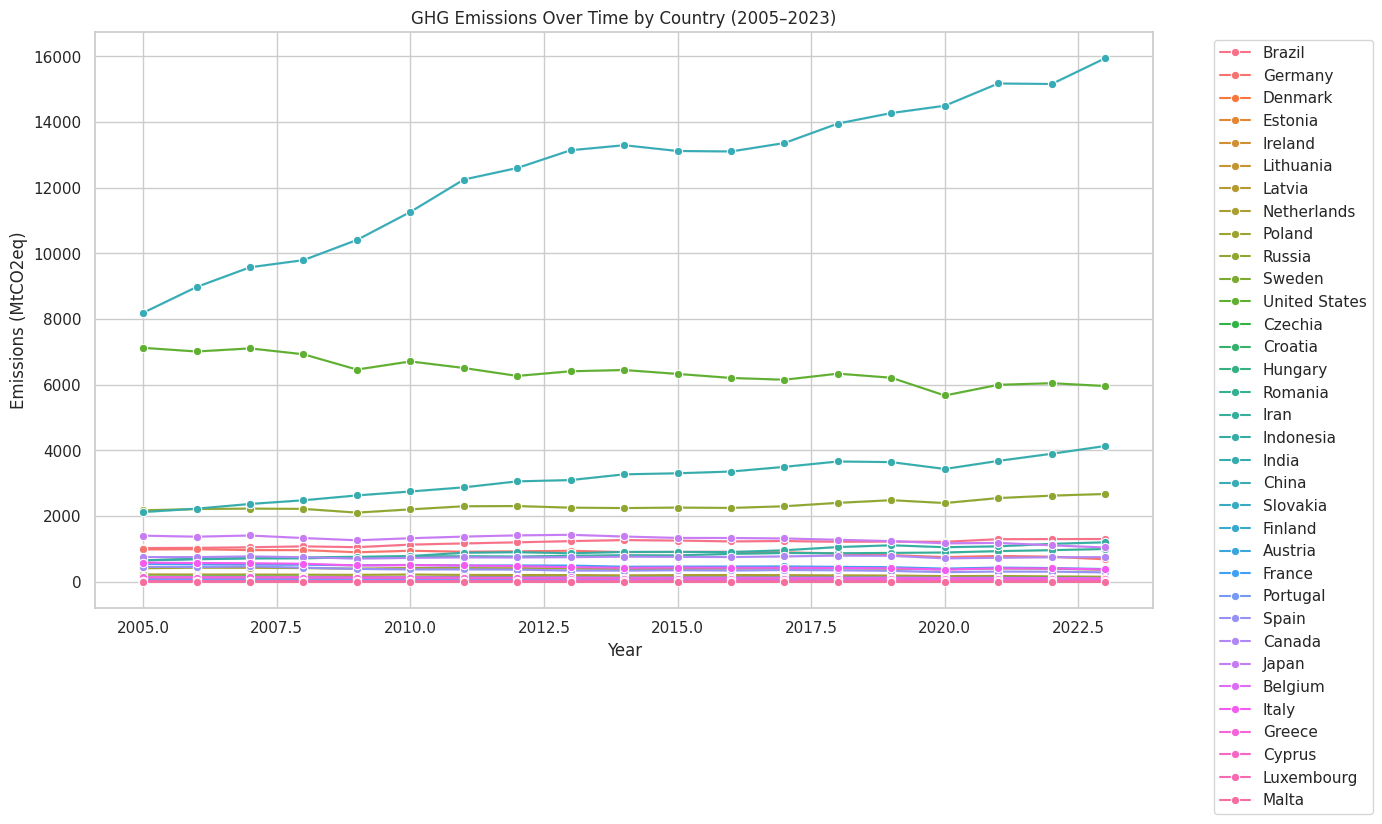

In [35]:
#Timeseries
# Step 1: Identify year columns as integers
year_columns = list(range(2005, 2024))  # integers, not strings

# Step 2: Melt the DataFrame
id_vars = ["Country", "Year", "Disaster Type", "Total Deaths", "Total Affected"]
df_ghg_long = df_total_ts_merge.melt(
    id_vars=id_vars,
    value_vars=year_columns,
    var_name="GHG Year",
    value_name="GHG Emissions (MtCO2eq)"
)

# Step 3: Ensure Year is integer (if needed)
df_ghg_long["Year"] = df_ghg_long["Year"].astype(int)

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_ghg_long, x="GHG Year", y="GHG Emissions (MtCO2eq)", hue="Country", marker='o')
plt.title("GHG Emissions Over Time by Country (2005–2023)")
plt.ylabel("Emissions (MtCO2eq)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

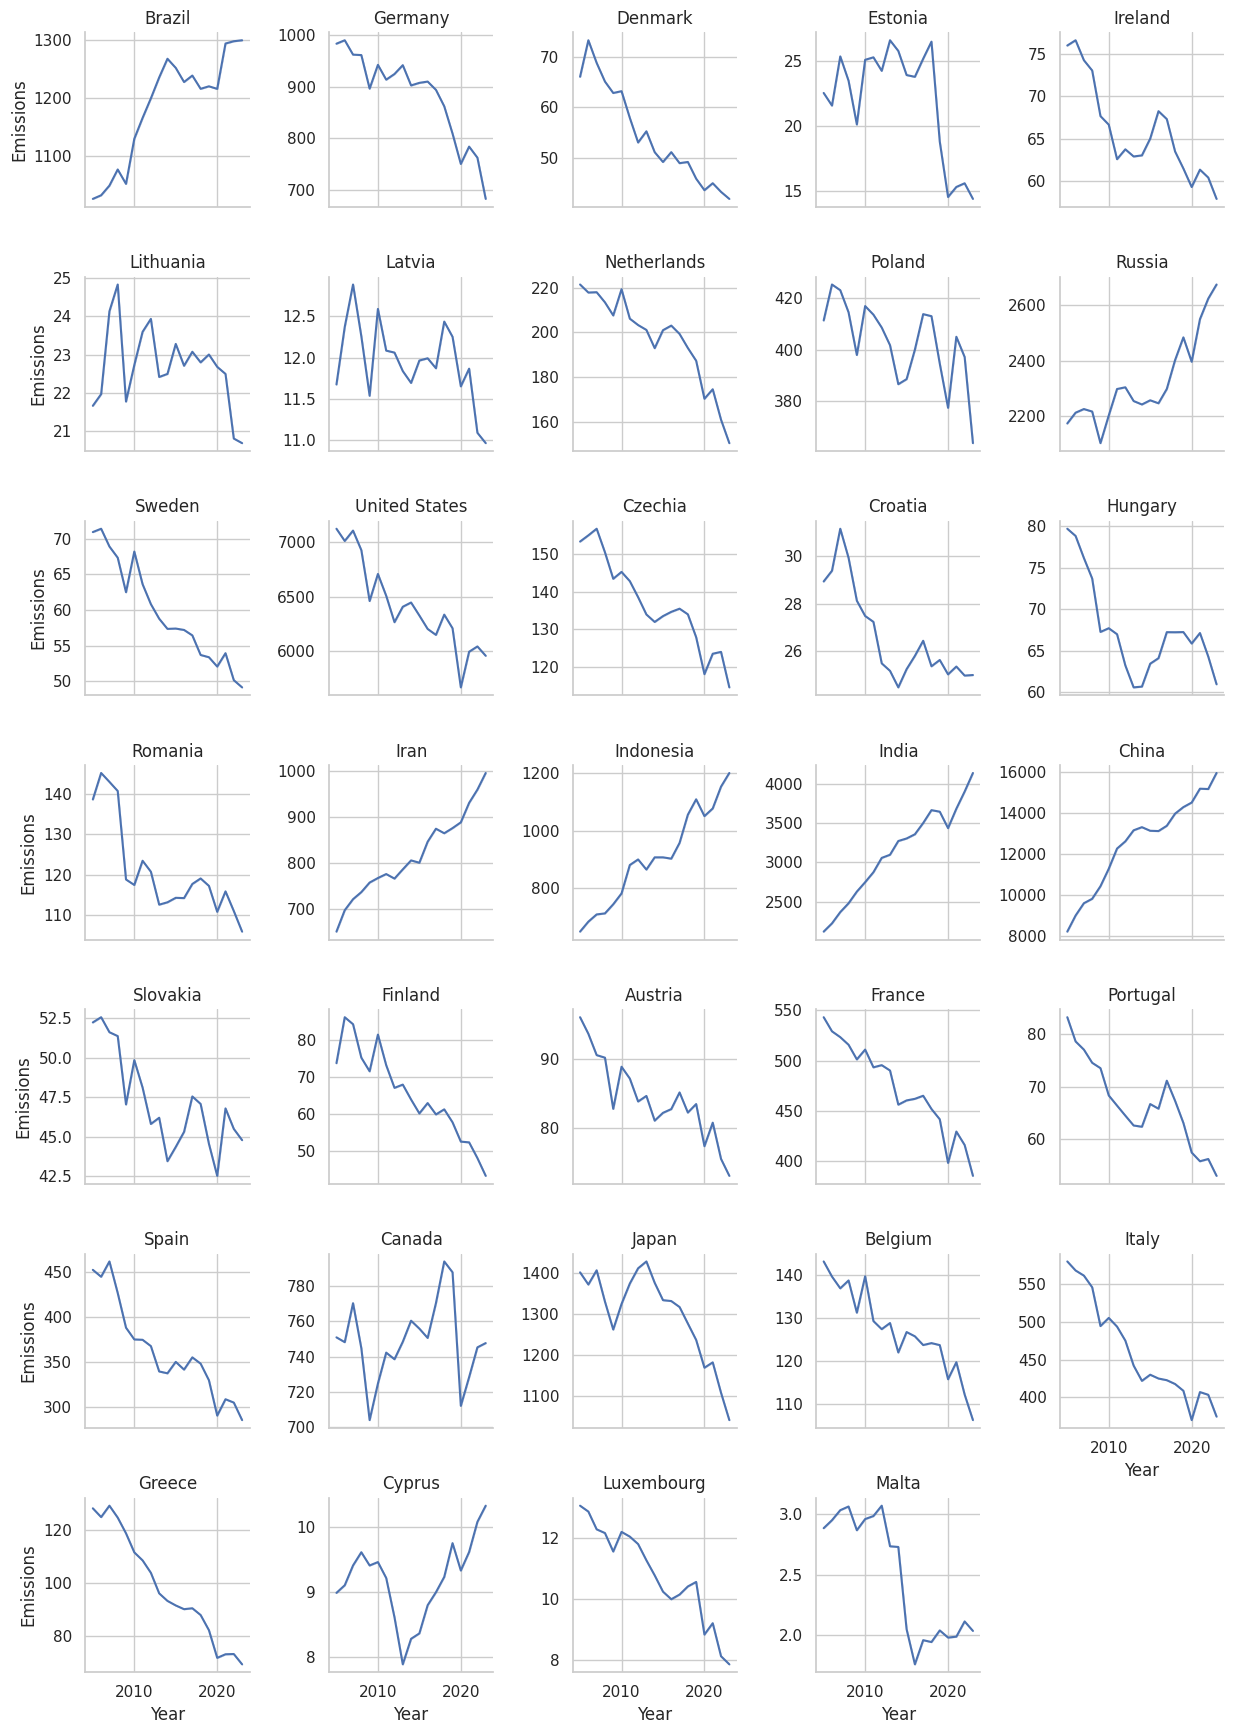

In [ ]:
# Subplots
g = sns.FacetGrid(df_ghg_long, col="Country", col_wrap=5, height=2.5, sharey=False)
g.map_dataframe(sns.lineplot, x="GHG Year", y="GHG Emissions (MtCO2eq)")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Emissions")
g.tight_layout()
plt.show()


In [ ]:
# Interactive One
fig = px.line(
    df_ghg_long,
    x="GHG Year",
    y="GHG Emissions (MtCO2eq)",
    color="Country",
    line_group="Country",
    title="GHG Emissions Over Time by Country (2005–2023)",
)
fig.update_layout(showlegend=True)
fig.show()


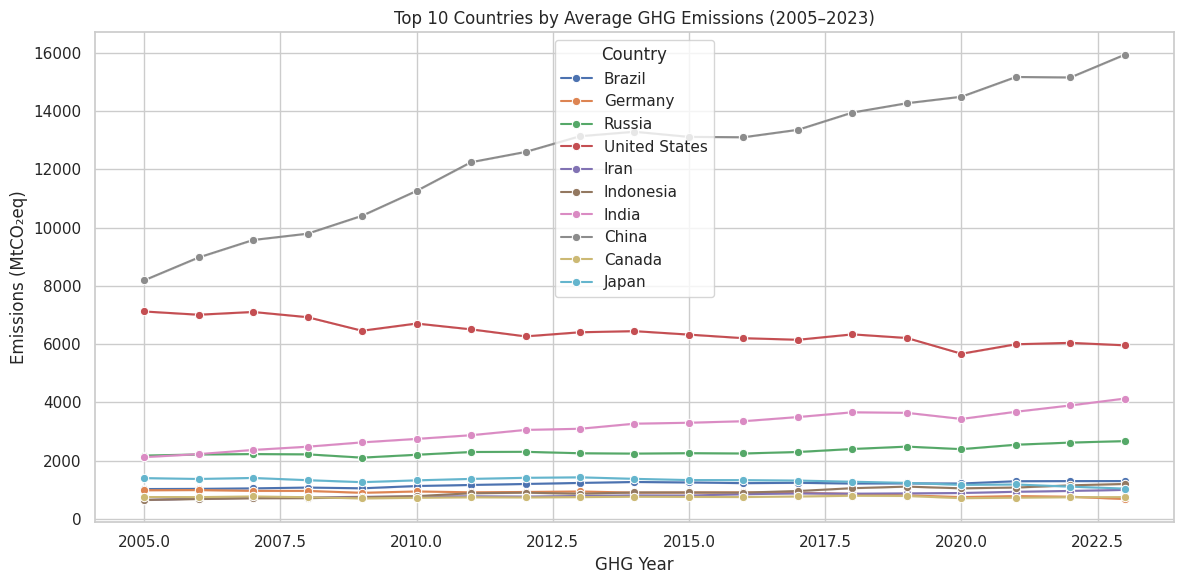

In [ ]:
# Step 1: Convert emissions to numeric (safely)
df_ghg_long["GHG Emissions (MtCO2eq)"] = pd.to_numeric(
    df_ghg_long["GHG Emissions (MtCO2eq)"], errors="coerce"
)

# Step 2: Get top 10 average emitters
top_emitters = (
    df_ghg_long.groupby("Country")["GHG Emissions (MtCO2eq)"]
    .mean()
    .nlargest(10)
    .index
)

# Step 3: Filter data to only top emitters
df_top = df_ghg_long[df_ghg_long["Country"].isin(top_emitters)]

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top,
    x="GHG Year",
    y="GHG Emissions (MtCO2eq)",
    hue="Country",
    marker="o"
)
plt.title("Top 10 Countries by Average GHG Emissions (2005–2023)")
plt.ylabel("Emissions (MtCO₂eq)")
plt.tight_layout()
plt.show()


None of the EUs are there.

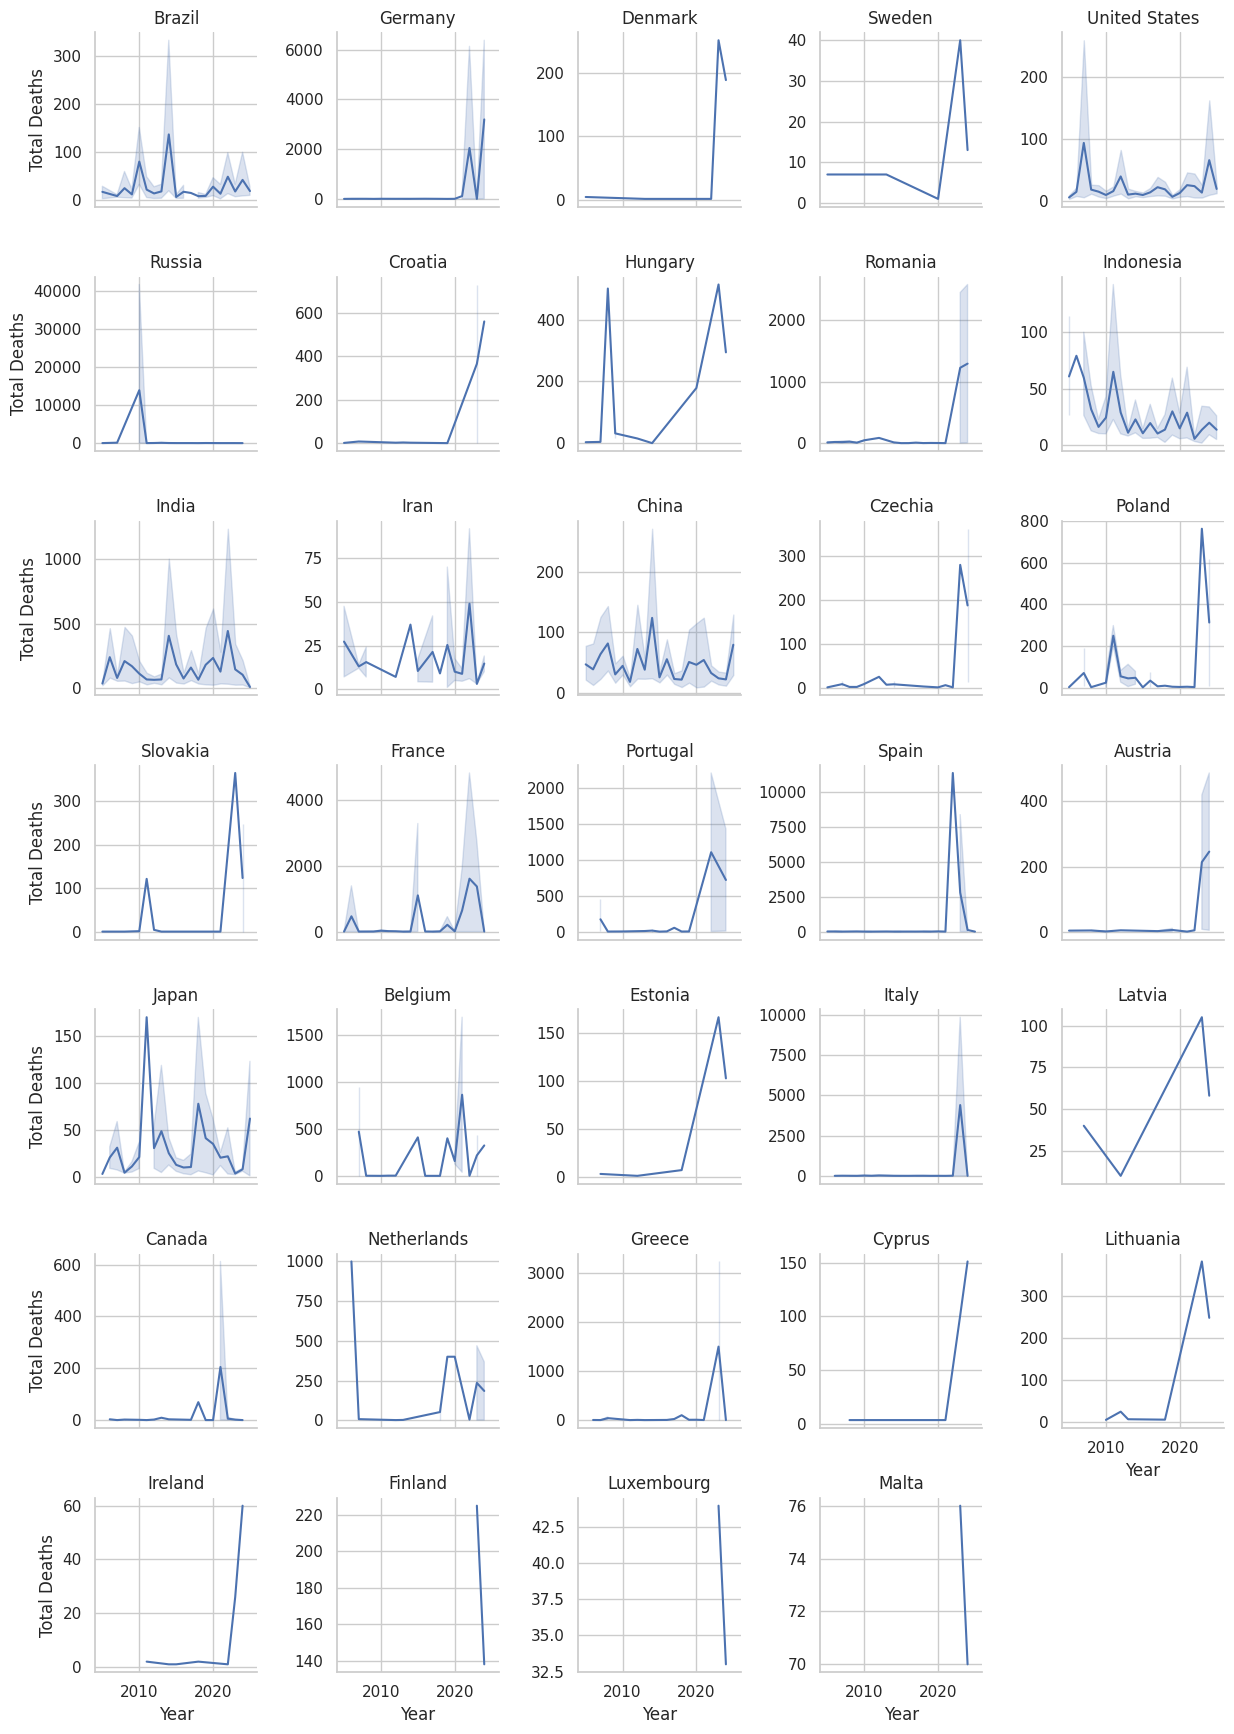

In [ ]:
# Step 1: Filter out rows with missing death data (optional but helps clean)
df_death_timeseries = df_total_ts_merge.dropna(subset=["Total Deaths"])

# Step 2: Create FacetGrid
g = sns.FacetGrid(df_death_timeseries, col="Country", col_wrap=5, height=2.5, sharey=False)

# Step 3: Plot death count over years
g.map_dataframe(sns.lineplot, x="Year", y="Total Deaths")

# Step 4: Label and layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Total Deaths")
g.tight_layout()
plt.show()


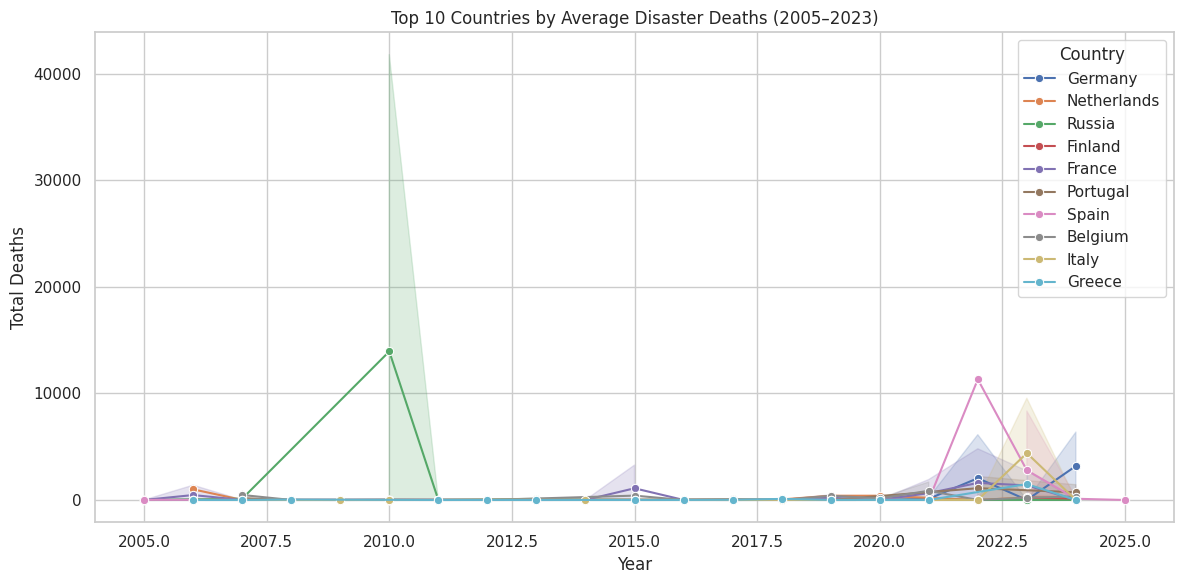

In [ ]:
# Top 10 by average deaths
top_deaths = df_total_ts_merge.groupby("Country")["Total Deaths"].mean().nlargest(10).index
df_top_deaths = df_total_ts_merge[df_total_ts_merge["Country"].isin(top_deaths)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_deaths,
    x="Year", y="Total Deaths", hue="Country", marker="o"
)
plt.title("Top 10 Countries by Average Disaster Deaths (2005–2023)")
plt.ylabel("Total Deaths")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [ ]:
# Interactive One
fig = px.line(
    df_ghg_long,
    x="Year",
    y="Total Deaths",
    color="Country",
    line_group="Country",
    title="Total Deaths by Disaster Timeseries",
)
fig.update_layout(showlegend=True)
fig.show()


## **GHG per Sector**

In [ ]:
# Step 1: Identify all year columns before 2005
columns_to_drop = [col for col in df_sector_filtered.columns
                   if str(col).isdigit() and int(col) < 2005]

# Step 2: Drop those columns
df_sector_filtered = df_sector_filtered.drop(columns=columns_to_drop)
df_sector_filtered.head(6)

Substance       Sector EDGAR Country Code  Country       2005       2006  \
5        CO2  Agriculture                AUT  Austria   0.014352   0.035305   
7        CO2  Agriculture                BEL  Belgium   0.053952   0.053952   
12       CO2  Agriculture                BRA   Brazil   5.088285   5.521109   
13       CO2  Agriculture                CAN   Canada   1.969838   2.479505   
16       CO2  Agriculture                CHN    China  21.118059  23.503068   
22       CO2  Agriculture                CYP   Cyprus   0.006286   0.009114   

         2007       2008       2009       2010  ...       2014       2015  \
5    0.053952   0.033000   0.040857   0.031429  ...   0.062857   0.081138   
7    0.066524   0.047667   0.060238   0.045048  ...   0.046619   0.040333   
12   7.153142   6.306509   6.280004   6.427719  ...   8.596080   7.980028   
13   2.431890   2.344205   2.491133   2.766290  ...   3.486633   3.587676   
16  21.483311  20.461306  24.608882  21.370116  ...  22.587816  24.650839   
22   0.004610   0.005657   0.004086   0.005500  ...   0.005500   0.004086   

         2016       2017       2018       2019       2020       2021  \
5    0.071500   0.066419   0.054110   0.052852   0.050233   0.044890   
7    0.040333   0.040333   0.040333   0.040333   0.040333   0.036457   
12   9.309666   9.365818   9.228214   9.793142  11.522971  12.831970   
13   3.406333   3.655195   3.715119   4.034800   4.076861   3.694009   
16  18.205783  15.161717  15.377946  17.131869  16.281150  15.915322   
22   0.004557   0.003614   0.005814   0.003929   0.005657   0.003457   

         2022       2023  
5    0.041962   0.039931  
7    0.036143   0.029612  
12  12.979919  13.229120  
13   3.703538   3.792822  
16  15.480822  15.061574  
22   0.003551   0.003649  

[6 rows x 23 columns]

In [ ]:
# Count how many entries for each substance and sector
print(df_sector_filtered["Substance"].value_counts())
print(df_sector_filtered["Sector"].value_counts())


Substance
GWP_100_AR5_N2O        279
GWP_100_AR5_CH4        278
CO2                    271
GWP_100_AR5_F-gases     35
Name: count, dtype: int64
Sector
Processes                138
Buildings                105
Power Industry           105
Industrial Combustion    105
Transport                105
Fuel Exploitation        104
Agriculture              103
Waste                     98
Name: count, dtype: int64


In [ ]:
# Make sure year columns are strings
df_sector_filtered.columns = df_sector_filtered.columns.map(str)

# Define year columns from 2005 to 2023
year_columns = [str(year) for year in range(2005, 2024)]

# Melt the DataFrame
df_sector_long = df_sector_filtered.melt(
    id_vars=["Sector", "Substance", "Country"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Emissions"
)

# Group by Substance
substance_emissions = df_sector_long.groupby("Substance")["Emissions"].sum().reset_index()
substance_emissions = substance_emissions.sort_values(by="Emissions", ascending=False)
# Group by Sector
sector_emissions = df_sector_long.groupby("Sector")["Emissions"].sum().reset_index()
sector_emissions = sector_emissions.sort_values(by="Emissions", ascending=False)

Pie Chart

<ipython-input-95-3e700b8c0d4a>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




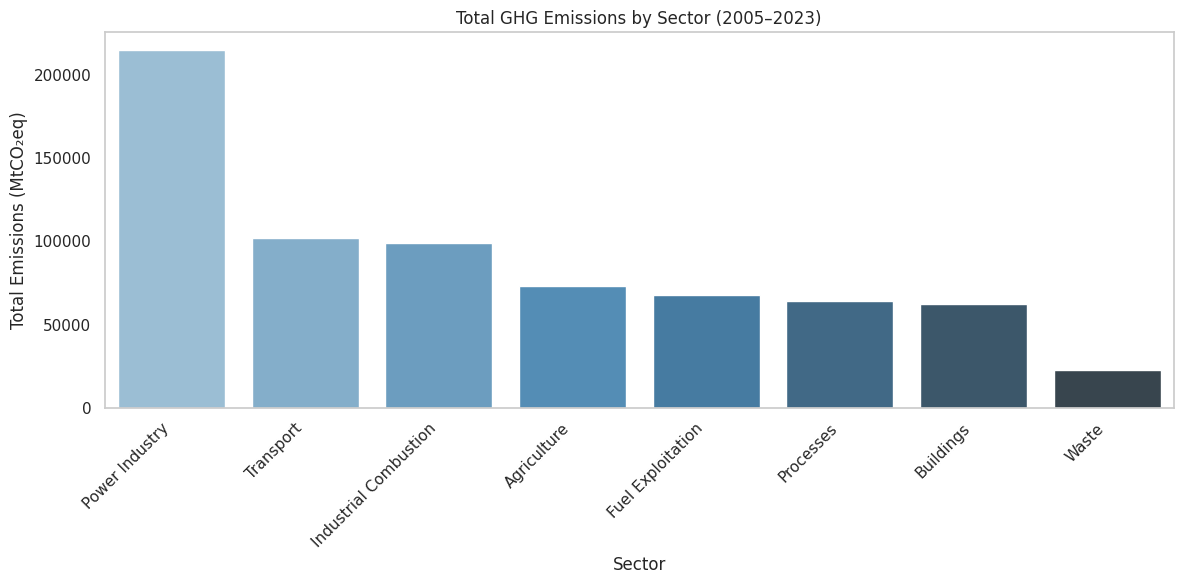

In [ ]:
# Ensure year columns are strings
df_sector_filtered.columns = df_sector_filtered.columns.map(str)

# Step 1: Melt from wide to long
year_columns = [str(year) for year in range(2005, 2024)]
df_sector_long = df_sector_filtered.melt(
    id_vars=["Sector", "Substance", "Country"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Emissions"
)
# Step 2: Group and sort

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sector_emissions,
    x="Sector",
    y="Emissions",
    palette="Blues_d"
)
plt.xticks(rotation=45, ha='right')
plt.title("Total GHG Emissions by Sector (2005–2023)")
plt.xlabel("Sector")
plt.ylabel("Total Emissions (MtCO₂eq)")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


SECTOR AND SUBSTANCES

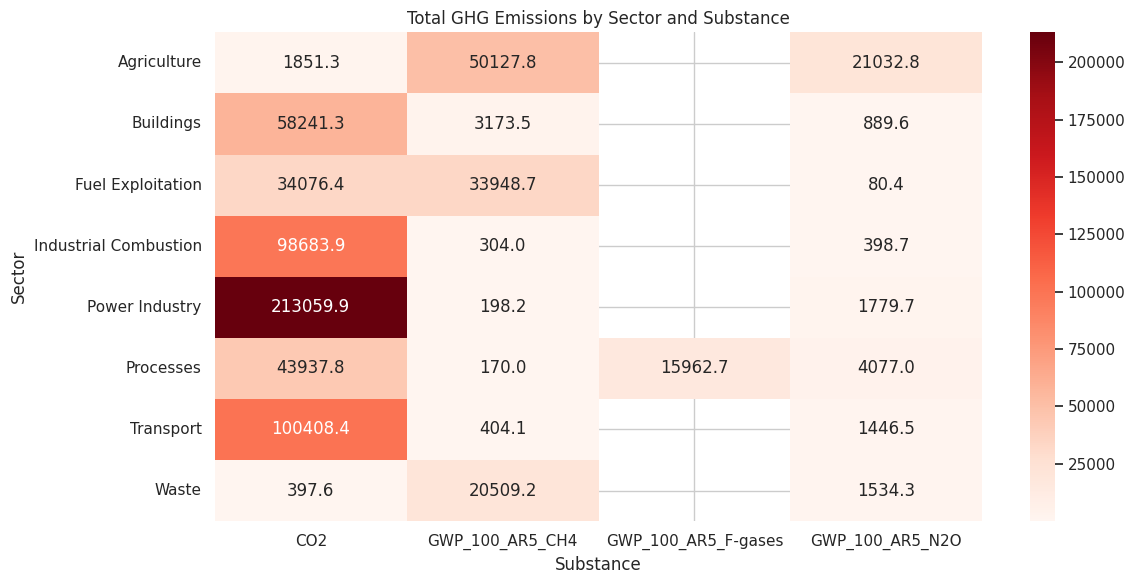

In [ ]:
# Group and pivot
heatmap_data = df_sector_long.groupby(["Sector", "Substance"])["Emissions"].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds")
plt.title("Total GHG Emissions by Sector and Substance")
plt.ylabel("Sector")
plt.xlabel("Substance")
plt.tight_layout()
plt.show()


In [ ]:
# Aggregate
grouped = df_sector_long.groupby(["Sector", "Substance"])["Emissions"].sum().reset_index()

# Plot
fig = px.bar(grouped,
             x="Sector",
             y="Emissions",
             color="Substance",
             barmode="group",
             title="GHG Emissions by Sector and Substance")
fig.show()


In [ ]:
fig = px.treemap(grouped,
                 path=["Sector", "Substance"],
                 values="Emissions",
                 title="GHG Emissions by Sector and Substance")
fig.show()

In [ ]:
dominant = df_sector_long.groupby(["Sector", "Substance"])["Emissions"].sum().reset_index()
dominant = dominant.sort_values("Emissions", ascending=False).groupby("Sector").first().reset_index()
display(dominant)


Sector        Substance      Emissions
0            Agriculture  GWP_100_AR5_CH4   50127.841550
1              Buildings              CO2   58241.266278
2      Fuel Exploitation              CO2   34076.410120
3  Industrial Combustion              CO2   98683.870161
4         Power Industry              CO2  213059.886272
5              Processes              CO2   43937.793243
6              Transport              CO2  100408.352519
7                  Waste  GWP_100_AR5_CH4   20509.211809

In [ ]:
# Plot pie chart
fig = px.pie(
    substance_emissions,
    names="Substance",
    values="Emissions",
    title="Total GHG Emissions by Substance (2005–2023)",
    hole=0.3
)
fig.show()

# Plot pie chart
fig = px.pie(
    sector_emissions,
    names="Sector",
    values="Emissions",
    title="Total GHG Emissions by Sector (2005–2023)",
    hole=0.3
)
fig.show()


Time Series by Substance

<ipython-input-99-edaf9f34b643>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




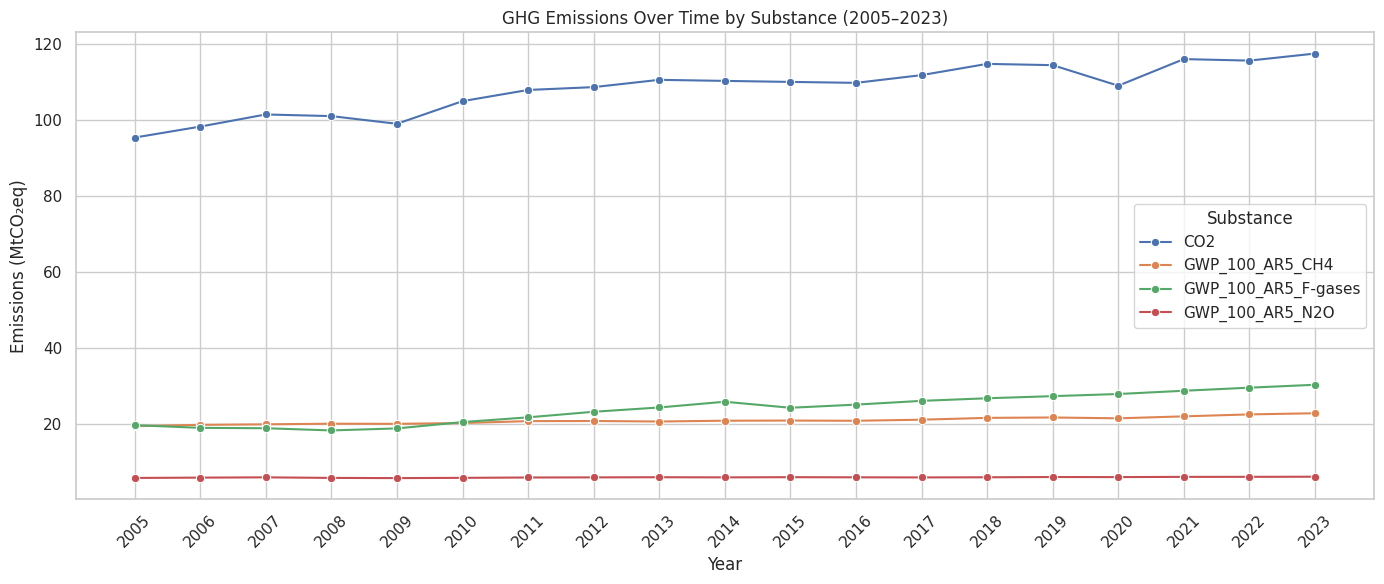

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_sector_long,
    x="Year",
    y="Emissions",
    hue="Substance",
    marker='o',
    ci=None  # <- This disables the transparent range
)
plt.title("GHG Emissions Over Time by Substance (2005–2023)")
plt.ylabel("Emissions (MtCO₂eq)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

<ipython-input-102-058e0b67d590>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




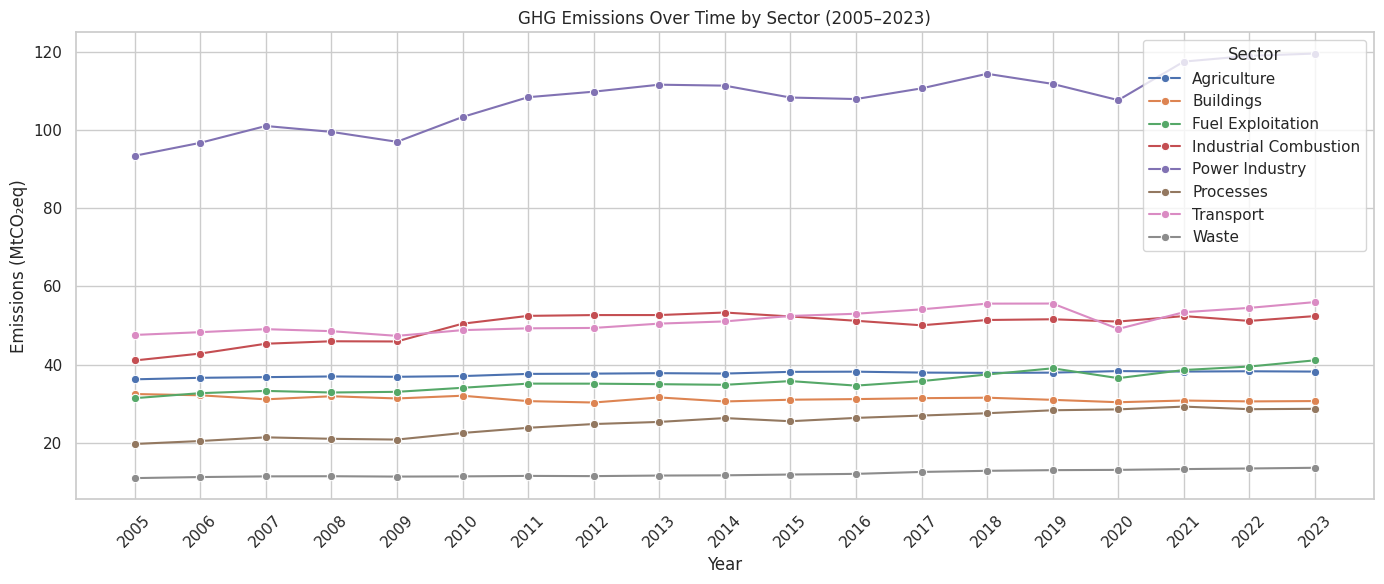

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_sector_long,
    x="Year",
    y="Emissions",
    hue="Sector",
    marker='o',
    ci=None  # <-- Disable the transparent shaded range
)
plt.title("GHG Emissions Over Time by Sector (2005–2023)")
plt.ylabel("Emissions (MtCO₂eq)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Merge disaster data with GHG_Sector
df_combined_sector = pd.merge(
    df_disaster_with_eu,
    df_sector_filtered,
    on="Country",
    how="inner"  # or "left" if you want to keep all disaster countries
)

# Drop EDGAR country code
df_combined_sector= df_combined_sector.drop(columns=["EDGAR Country Code"])

# Drop year columns before 2005
year_columns_to_drop = [col for col in df_combined_sector.columns if str(col).isdigit() and int(col) < 2005]
df_combined_sector = df_combined_sector.drop(columns=year_columns_to_drop)

# Choose columns for GHG emissions (assuming they are years)
ghg_years = [col for col in df_combined_sector.columns if str(col).isdigit() and int(col) >= 2005]
df_combined_sector["Total GHG Emissions"] = df_combined_sector[ghg_years].sum(axis=1)

# Check result
df_combined_sector.head()

Country  Total Deaths  Total Affected  Total Damage, Adjusted ('000 US$)  \
0  Austria         966.0          4179.0                          4836453.0   
1  Austria         966.0          4179.0                          4836453.0   
2  Austria         966.0          4179.0                          4836453.0   
3  Austria         966.0          4179.0                          4836453.0   
4  Austria         966.0          4179.0                          4836453.0   

   Disaster Count  Total Damage (Million USD) Region Substance  \
0            24.0                    4836.453     EU       CO2   
1            24.0                    4836.453     EU       CO2   
2            24.0                    4836.453     EU       CO2   
3            24.0                    4836.453     EU       CO2   
4            24.0                    4836.453     EU       CO2   

                  Sector       2005  ...       2015       2016       2017  \
0            Agriculture   0.014352  ...   0.081138   0.071500   0.066419   
1              Buildings  13.272449  ...   8.578549   8.812774   8.979268   
2      Fuel Exploitation   8.117717  ...   6.712515   6.290422   6.459711   
3  Industrial Combustion  11.046161  ...  10.419177  10.709399  10.635389   
4         Power Industry  18.380389  ...  13.246616  12.796043  14.225643   

        2018       2019       2020       2021       2022       2023  \
0   0.054110   0.052852   0.050233   0.044890   0.041962   0.039931   
1   8.187758   8.420193   8.427146   9.413813   7.946189   7.433210   
2   5.606360   6.483179   5.760887   6.155448   5.710652   5.705675   
3  10.543106  10.650628  10.397050  10.790585  10.397718   9.561005   
4  12.908087  13.034896  11.410867  12.206886  11.056960  10.185016   

   Total GHG Emissions  
0             0.904797  
1           181.198017  
2           132.947231  
3           203.540292  
4           267.960781  

[5 rows x 29 columns]

Sector Plot

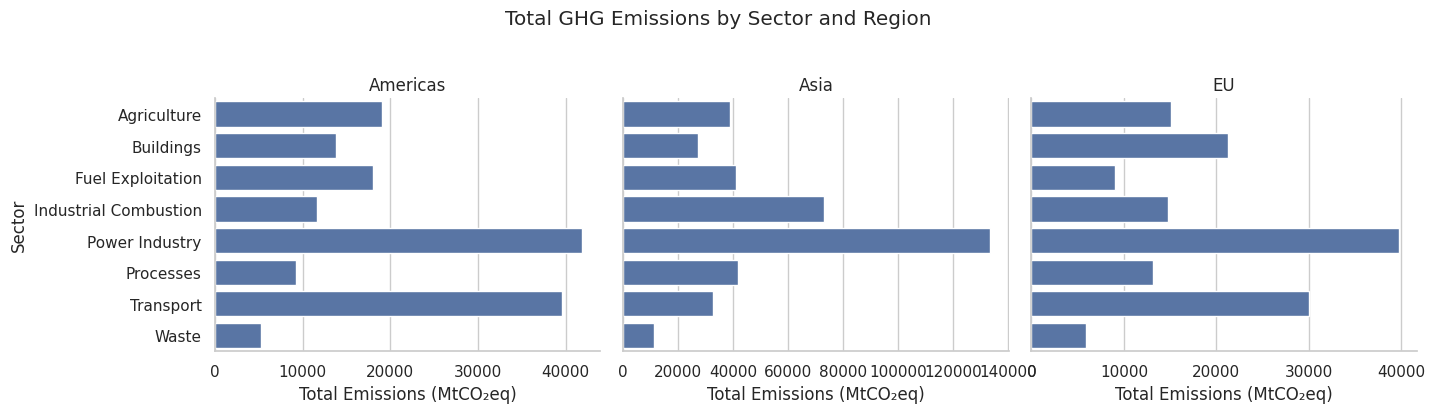

In [ ]:
df_sector_facet = df_combined_sector.groupby(["Region", "Sector"], as_index=False)["Total GHG Emissions"].sum()

# Plot
g = sns.catplot(
    data=df_sector_facet,
    x="Total GHG Emissions",
    y="Sector",
    col="Region",
    kind="bar",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharex=False
)

g.set_titles("{col_name}")
g.set_axis_labels("Total Emissions (MtCO₂eq)", "Sector")
g.fig.suptitle("Total GHG Emissions by Sector and Region", y=1.03)
plt.tight_layout()
plt.show()

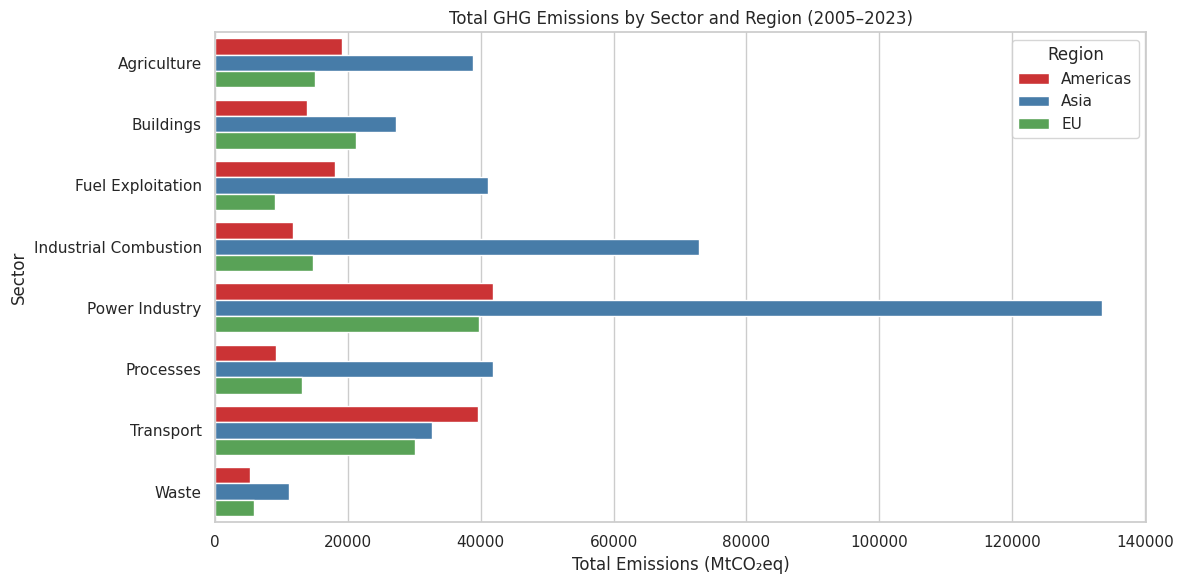

In [ ]:
# Aggregate GHG emissions by Region and Sector
df_sector_facet = df_combined_sector.groupby(["Sector", "Region"], as_index=False)["Total GHG Emissions"].sum()

# Plot grouped bars
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_sector_facet,
    x="Total GHG Emissions",
    y="Sector",
    hue="Region",             # Dodged color by region
    dodge=True,
    palette="Set1"
)

# Final touches
plt.title("Total GHG Emissions by Sector and Region (2005–2023)")
plt.xlabel("Total Emissions (MtCO₂eq)")
plt.ylabel("Sector")
plt.grid(True, axis='x')
plt.tight_layout()
plt.legend(title="Region")
plt.show()

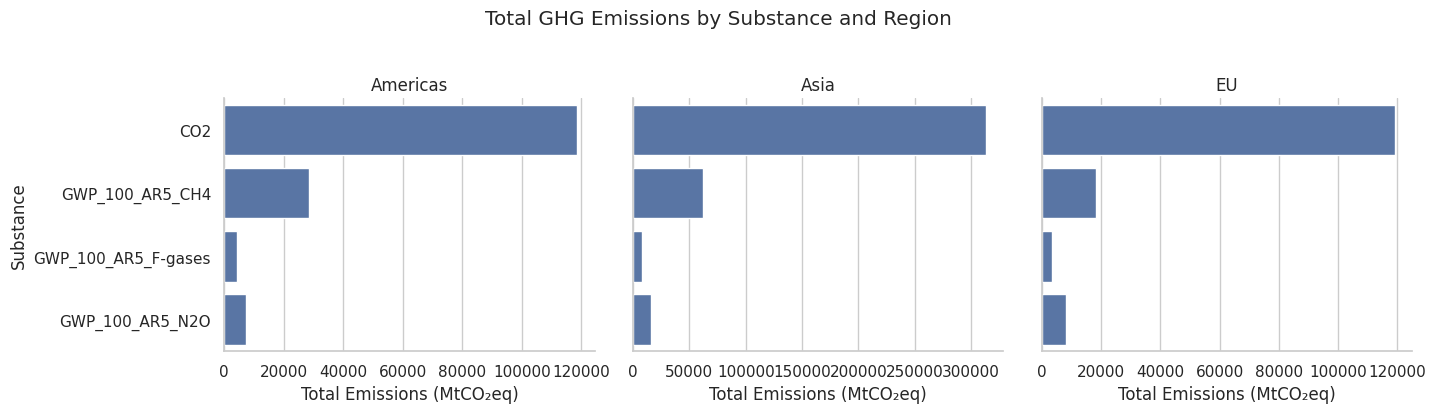

In [ ]:
# Aggregate
df_substance_facet = df_combined_sector.groupby(["Region", "Substance"], as_index=False)["Total GHG Emissions"].sum()

# Plot
g = sns.catplot(
    data=df_substance_facet,
    x="Total GHG Emissions",
    y="Substance",
    col="Region",
    kind="bar",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharex=False
)

g.set_titles("{col_name}")
g.set_axis_labels("Total Emissions (MtCO₂eq)", "Substance")
g.fig.suptitle("Total GHG Emissions by Substance and Region", y=1.03)
plt.tight_layout()
plt.show()


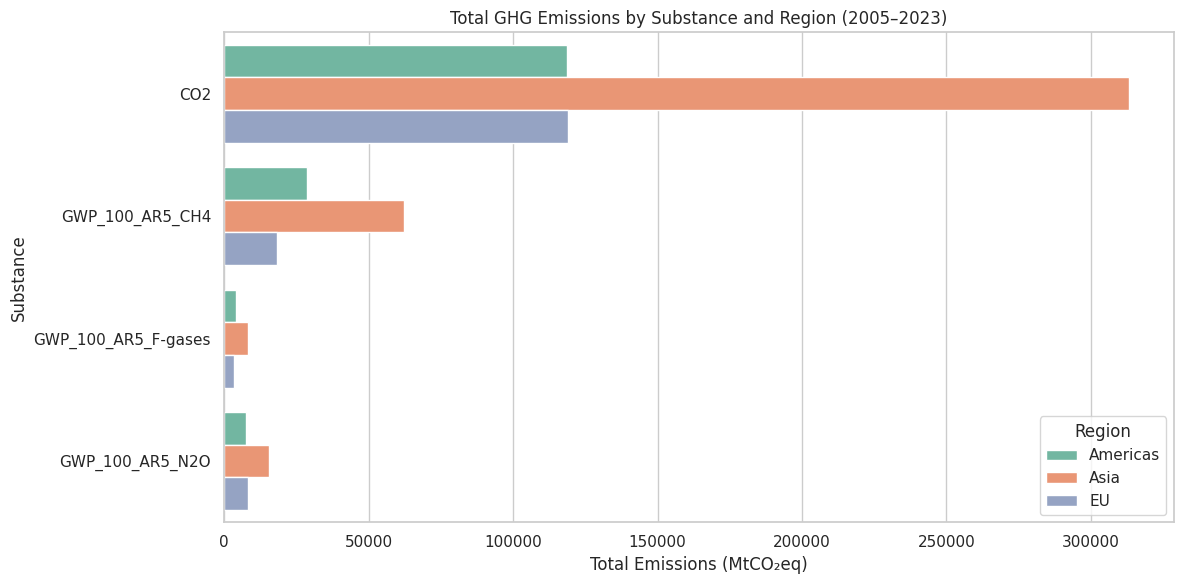

In [ ]:
# Aggregate GHG emissions by Region and Substance
df_substance_facet = df_combined_sector.groupby(["Substance", "Region"], as_index=False)["Total GHG Emissions"].sum()

# Plot grouped bars
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_substance_facet,
    x="Total GHG Emissions",
    y="Substance",
    hue="Region",           # Dodged bar by Region
    dodge=True,
    palette="Set2"
)

# Final touches
plt.title("Total GHG Emissions by Substance and Region (2005–2023)")
plt.xlabel("Total Emissions (MtCO₂eq)")
plt.ylabel("Substance")
plt.grid(True, axis='x')
plt.tight_layout()
plt.legend(title="Region")
plt.show()


In [ ]:
# Group countries by region
region_countries = df_combined_sector.groupby("Region")["Country"].unique()

# Convert to DataFrame for easier viewing (optional)
region_countries_df = region_countries.reset_index().explode("Country").groupby("Region")["Country"].unique()

# Display
for region, countries in region_countries_df.items():
    print(f"\n{region} ({len(countries)} countries):")
    print(", ".join(sorted(countries)))



Americas (3 countries):
Brazil, Canada, United States

Asia (6 countries):
China, India, Indonesia, Iran, Japan, Russia

EU (26 countries):
Austria, Belgium, Croatia, Cyprus, Czechia, Denmark, EU27, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Spain, Sweden
